<a href="https://colab.research.google.com/github/jerryshenfewcher/Cits4012/blob/main/ABSA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abstract

Import data from Google Drive

1. 下载数据并加载数据

In [92]:
# Download from Github

!wget https://raw.githubusercontent.com/jerryshenfewcher/Cits4012/main/test.json
!wget https://raw.githubusercontent.com/jerryshenfewcher/Cits4012/main/train.json
!wget https://raw.githubusercontent.com/jerryshenfewcher/Cits4012/main/val.json
!ls

--2024-05-17 12:07:39--  https://raw.githubusercontent.com/jerryshenfewcher/Cits4012/main/test.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 141274 (138K) [text/plain]
Saving to: ‘test.json.8’

test.json.8         100%[===================>] 137.96K  --.-KB/s    in 0.03s   

2024-05-17 12:07:39 (5.21 MB/s) - ‘test.json.8’ saved [141274/141274]

--2024-05-17 12:07:39--  https://raw.githubusercontent.com/jerryshenfewcher/Cits4012/main/train.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1136800 (1.1M) [text/plain]
Saving

In [93]:
import json
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize


nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

2. 数据预处理

In [94]:
def fileopen(file):
  with open(file, 'r') as f:
    data = json.load(f)
    return data

test_data = fileopen('test.json')
train_data = fileopen('train.json')
val_data = fileopen('val.json')

print(test_data)
print(train_data)
print(val_data)

{'columns': ['sentence', 'aspect', 'polarity'], 'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 21

Data Preprocess

In [95]:
# These are just common English contractions.
contraction_dict = {
    "ain't": "is not", "aren't": "are not", "can't": "cannot", "'cause": "because", "could've": "could have",
    "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not",
    "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'll": "he will", "he's": "he is",
    "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would",
    "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have",
    "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have", "i'm": "i am",
    "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will",
    "it'll've": "it will have", "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not",
    "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have",
    "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
    "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have",
    "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have",
    "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "so's": "so as",
    "this's": "this is", "that'd": "that would", "that'd've": "that would have", "that's": "that is",
    "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is",
    "they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have",
    "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
    "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have",
    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is",
    "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
    "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
    "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
    "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
    "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have",
    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are",
    "you've": "you have"
}

def pre_process(data):
    output = []
    for sent_list in data["data"]:
        sent = sent_list[0].lower()  # Assuming the first element is the sentence
        for word, new_word in contraction_dict.items():
            sent = sent.replace(word, new_word)  # Dealing with contractions
        sent = re.sub(r'[^\w\s]', '', sent)  # Removing punctuation
        tokens = word_tokenize(sent)  # Tokenization
        aspect = sent_list[1]
        polarity = sent_list[2]
        output.append([tokens, [aspect], [polarity]])
    return output

# 预处理数据
train_token_list = pre_process(train_data)
test_token_list = pre_process(test_data)
val_token_list = pre_process(val_data)

# 分割数据
train_token_list, train_aspect_list, train_polarity_list = zip(*train_token_list)
test_token_list, test_aspect_list, test_polarity_list = zip(*test_token_list)
val_token_list, val_aspect_list, val_polarity_list = zip(*val_token_list)

train_token_list = list(train_token_list)
train_aspect_list = list(train_aspect_list)
train_polarity_list = list(train_polarity_list)

test_token_list = list(test_token_list)
test_aspect_list = list(test_aspect_list)
test_polarity_list = list(test_polarity_list)

val_token_list = list(val_token_list)
val_aspect_list = list(val_aspect_list)
val_polarity_list = list(val_polarity_list)

# 添加特殊标记
output_test_polarity_list = [["<BOS>"] + s for s in test_polarity_list]
target_test_polarity_list = [s + ["<EOS>"] for s in test_polarity_list]

output_train_polarity_list = [["<BOS>"] + s for s in train_polarity_list]
target_train_polarity_list = [s + ["<EOS>"] for s in train_polarity_list]

output_val_polarity_list = [["<BOS>"] + s for s in val_polarity_list]
target_val_polarity_list = [s + ["<EOS>"] for s in val_polarity_list]

print(output_test_polarity_list[0])


['<BOS>', 'neutral']


3. 创建词汇表

In [96]:
import gensim.downloader as api
# 加载预训练的Word2Vec模型
word2vec_model = api.load('glove-wiki-gigaword-100')  # 使用较小的GloVe模型，维度为100

# 创建词汇到索引的字典，并限制词汇表大小
word_to_ix = {"<BOS>": 0, "<EOS>": 1, "<PAD>": 2, "<UNK>": 3}
embedding_dim = word2vec_model.vector_size

for word in word2vec_model.index_to_key:
    if word not in word_to_ix:
        word_to_ix[word] = len(word_to_ix)
    if len(word_to_ix) >= 50000:  # 限制词汇表大小为50000
        break

# 在训练数据中添加未见单词
for sentence in train_token_list + test_token_list + output_train_polarity_list + output_test_polarity_list:
    for word in sentence:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
            #word_to_ix[word] = word_to_ix["<UNK>"]

# 确保特殊标记 '<UNK>' 和 '<PAD>' 已添加到词汇表中
word_to_ix.setdefault('<UNK>', len(word_to_ix))
word_to_ix.setdefault('<PAD>', len(word_to_ix) + 1)

2

4. 将文本数据转换为索引

In [97]:
def to_index(data, to_ix):
    """Convert text data to index using the given vocabulary index map."""
    index_list = []
    for sent in data:
        # Convert each word in the sentence to its corresponding index.
        # Use the index for '<UNK>' if the word is not in the vocabulary.
        index_list.append([to_ix.get(w, to_ix['<UNK>']) for w in sent])
    return index_list

# Ensure special tokens '<UNK>' and '<PAD>' are added to the dictionary
word_to_ix.setdefault('<UNK>', len(word_to_ix))
word_to_ix.setdefault('<PAD>', len(word_to_ix) + 1)

# Convert training data to indices
input_index = to_index(train_token_list, word_to_ix)
output_index = to_index(output_train_polarity_list, word_to_ix)
target_index = to_index(target_train_polarity_list, word_to_ix)

# Print results to verify conversion
print("Training Input Indices (first 3):", input_index[:3])
print("Training Output Indices (first 3):", output_index[:3])
print("Training Target Indices (first 3):", target_index[:3])

# Convert test data to indices
test_input_index = to_index(test_token_list, word_to_ix)
test_output_index = to_index(output_test_polarity_list, word_to_ix)
test_target_index = to_index(target_test_polarity_list, word_to_ix)

# Print test data indices to verify conversion
print("Test Input Indices (first 3):", test_input_index[:3])
print("Test Output Indices (first 3):", test_output_index[:3])
print("Test Target Indices (first 3):", test_target_index[:3])

# 使用一个样例打印训练标签的前五个元素，方便了解数据结构
print("train_polarity_list (first 5 elements):")
for i in range(min(5, len(train_polarity_list))):  # 打印最多前五个元素
    print(f"Element {i}: {train_polarity_list[i]}")

# Verify if there are any indices that are out of the expected range (greater than vocab_size)
vocab_size = len(word_to_ix)
for idx_list in input_index + test_input_index:
    if any(idx >= vocab_size for idx in idx_list):
        print("Found index out of range in input data.")
        break

for idx_list in output_index + test_output_index:
    if any(idx >= vocab_size for idx in idx_list):
        print("Found index out of range in output data.")
        break

for idx_list in target_index + test_target_index:
    if any(idx >= vocab_size for idx in idx_list):
        print("Found index out of range in target data.")
        break

Training Input Indices (first 3): [[24, 418, 34, 4, 258, 3166, 139, 569, 45, 37, 44, 10, 4, 241, 104, 87, 85, 36, 226, 8, 4, 14832, 3945, 4350, 50, 4, 2641, 24, 98, 34, 124, 4, 245, 14, 85], [24, 418, 34, 4, 258, 3166, 139, 569, 45, 37, 44, 10, 4, 241, 104, 87, 85, 36, 226, 8, 4, 14832, 3945, 4350, 50, 4, 2641, 24, 98, 34, 124, 4, 245, 14, 85], [23785, 19, 2712, 23605, 65, 57, 1153, 33, 1156, 203, 14, 166, 9458]]
Training Output Indices (first 3): [[0, 1339], [0, 5880], [0, 1339]]
Training Target Indices (first 3): [[1339, 1], [5880, 1], [1339, 1]]
Test Input Indices (first 3): [[57, 392, 382, 9, 3227, 26, 4, 2073, 41, 83, 45, 44, 426, 44171, 7, 13529, 9, 40, 52, 25261, 45, 1302, 11, 7987, 7, 10956, 6823, 9, 67, 39, 63, 426, 10, 4, 7987, 4, 1037, 19, 2707, 21, 26862, 4, 14038, 19, 40, 155, 18779], [57, 392, 382, 9, 3227, 26, 4, 2073, 41, 83, 45, 44, 426, 44171, 7, 13529, 9, 40, 52, 25261, 45, 1302, 11, 7987, 7, 10956, 6823, 9, 67, 39, 63, 426, 10, 4, 7987, 4, 1037, 19, 2707, 21, 26862,

5. 拆分数据集

In [98]:
#  拆分训练集、验证集和测试集
from sklearn.model_selection import train_test_split

# 合并所有数据
all_token_list = train_token_list + val_token_list + test_token_list
all_aspect_list = train_aspect_list + val_aspect_list + test_aspect_list
all_polarity_list = train_polarity_list + val_polarity_list + test_polarity_list

# 先划分训练集和临时集（验证集+测试集）
train_tokens, temp_tokens, train_aspects, temp_aspects, train_polarities, temp_polarities = train_test_split(
    all_token_list, all_aspect_list, all_polarity_list, test_size=0.4, random_state=42
)

# 再划分验证集和测试集
val_tokens, test_tokens, val_aspects, test_aspects, val_polarities, test_polarities = train_test_split(
    temp_tokens, temp_aspects, temp_polarities, test_size=0.5, random_state=42
)

6. 创建张量

In [99]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
import torch.nn.functional as F

In [100]:
def create_tensors(data_list, to_ix, max_len):
    tensor_list = []
    for data in data_list:
        indexed = [to_ix.get(word, to_ix['<UNK>']) for word in data]
        indexed = indexed[:max_len]  # 截断到 max_len
        padding_length = max_len - len(indexed)
        indexed += [to_ix['<PAD>']] * padding_length  # 填充到 max_len 长度
        tensor = torch.tensor(indexed, dtype=torch.long)
        tensor_list.append(tensor)
    return tensor_list

label_mapping = {'neutral': 0, 'positive': 1, 'negative': 2}

def remap_labels(nested_labels, mapping):
    """Map string labels to integers using provided mapping and convert to tensor."""
    mapped_labels = [mapping[label[0]] for label in nested_labels]
    return torch.tensor(mapped_labels, dtype=torch.long)

In [101]:
# Here we simply use the maximum sentence length
max_len = max([len(s) for s in train_token_list] + [len(s) for s in target_train_polarity_list])

print(max_len)

67


In [102]:
# 打印部分`train_aspects`和`test_aspects`的原始数据
print("Original train_aspects:", train_aspect_list[:5])
print("Original test_aspects:", test_aspect_list[:5])

Original train_aspects: [['food'], ['place'], ['staff'], ['miscellaneous'], ['miscellaneous']]
Original test_aspects: [['place'], ['food'], ['food'], ['service'], ['staff']]


In [103]:
# 使用新词汇表进行数据处理
train_labels = remap_labels(train_polarity_list, label_mapping)
train_inputs = create_tensors(train_token_list, word_to_ix, max_len)
train_aspects = create_tensors(train_aspect_list, word_to_ix, max_len)

test_labels = remap_labels(test_polarity_list, label_mapping)
test_inputs = create_tensors(test_token_list, word_to_ix, max_len)
test_aspects = create_tensors(test_aspect_list, word_to_ix, max_len)

val_labels = remap_labels(val_polarity_list, label_mapping)
val_inputs = create_tensors(val_token_list, word_to_ix, max_len)
val_aspects = create_tensors(val_aspect_list, word_to_ix, max_len)

# 验证每个数据集的长度是否一致
assert len(train_inputs) == len(train_aspects) == len(train_labels), "Train dataset lengths are not equal!"
assert len(test_inputs) == len(test_aspects) == len(test_labels), "Test dataset lengths are not equal!"
assert len(val_inputs) == len(val_aspects) == len(val_labels), "Validation dataset lengths are not equal!"

# 打印前5个样例以进行调试
for i in range(5):
    print(f"Train Sample {i+1} - Token List: {train_token_list[i]}")
    print(f"Train Sample {i+1} - Aspect List: {train_aspect_list[i]}")
    print(f"Train Sample {i+1} - Processed Input Tensor: {train_inputs[i]}")
    print()

    print(f"Test Sample {i+1} - Token List: {test_token_list[i]}")
    print(f"Test Sample {i+1} - Aspect List: {test_aspect_list[i]}")
    print(f"Test Sample {i+1} - Processed Input Tensor: {test_inputs[i]}")
    print()

    print(f"Val Sample {i+1} - Token List: {val_token_list[i]}")
    print(f"Val Sample {i+1} - Aspect List: {val_aspect_list[i]}")
    print(f"Val Sample {i+1} - Processed Input Tensor: {val_inputs[i]}")
    print()

# 验证最大索引是否超出范围
max_train_input_index = max(max(seq) for seq in train_inputs)
max_test_input_index = max(max(seq) for seq in test_inputs)
max_val_input_index = max(max(seq) for seq in val_inputs)
max_train_aspect_index = max(max(seq) for seq in train_aspects)
max_test_aspect_index = max(max(seq) for seq in test_aspects)
max_val_aspect_index = max(max(seq) for seq in val_aspects)

print(f"Max train input index: {max_train_input_index}")
print(f"Max test input index: {max_test_input_index}")
print(f"Max val input index: {max_val_input_index}")
print(f"Max train aspect index: {max_train_aspect_index}")
print(f"Max test aspect index: {max_test_aspect_index}")
print(f"Max val aspect index: {max_val_aspect_index}")

if max(max_train_input_index, max_test_input_index, max_val_input_index, max_train_aspect_index, max_test_aspect_index, max_val_aspect_index) >= len(word_to_ix):
    raise ValueError("Some indices are out of the range of the embedding matrix.")

Train Sample 1 - Token List: ['it', 'might', 'be', 'the', 'best', 'sit', 'down', 'food', 'i', 'have', 'had', 'in', 'the', 'area', 'so', 'if', 'you', 'are', 'going', 'to', 'the', 'upright', 'citizen', 'brigade', 'or', 'the', 'garden', 'it', 'could', 'be', 'just', 'the', 'place', 'for', 'you']
Train Sample 1 - Aspect List: ['food']
Train Sample 1 - Processed Input Tensor: tensor([   24,   418,    34,     4,   258,  3166,   139,   569,    45,    37,
           44,    10,     4,   241,   104,    87,    85,    36,   226,     8,
            4, 14832,  3945,  4350,    50,     4,  2641,    24,    98,    34,
          124,     4,   245,    14,    85,     2,     2,     2,     2,     2,
            2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
            2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
            2,     2,     2,     2,     2,     2,     2])

Test Sample 1 - Token List: ['we', 'went', 'again', 'and', 'sat', 'at', 'the', 'bar', 'this', 'time'

# Model LSTM (RNN)

In [104]:
# 打印原始数据的前几条记录，检查数据结构是否一致
print("First few train token list entries:", train_token_list[:5])
print("First few train aspect list entries:", train_aspect_list[:5])
print("First few train polarity list entries:", train_polarity_list[:5])

print("First few test token list entries:", test_token_list[:5])
print("First few test aspect list entries:", test_aspect_list[:5])
print("First few test polarity list entries:", test_polarity_list[:5])

print("First few val token list entries:", val_token_list[:5])
print("First few val aspect list entries:", val_aspect_list[:5])
print("First few val polarity list entries:", val_polarity_list[:5])


First few train token list entries: [['it', 'might', 'be', 'the', 'best', 'sit', 'down', 'food', 'i', 'have', 'had', 'in', 'the', 'area', 'so', 'if', 'you', 'are', 'going', 'to', 'the', 'upright', 'citizen', 'brigade', 'or', 'the', 'garden', 'it', 'could', 'be', 'just', 'the', 'place', 'for', 'you'], ['it', 'might', 'be', 'the', 'best', 'sit', 'down', 'food', 'i', 'have', 'had', 'in', 'the', 'area', 'so', 'if', 'you', 'are', 'going', 'to', 'the', 'upright', 'citizen', 'brigade', 'or', 'the', 'garden', 'it', 'could', 'be', 'just', 'the', 'place', 'for', 'you'], ['hostess', 'was', 'extremely', 'accommodating', 'when', 'we', 'arrived', 'an', 'hour', 'early', 'for', 'our', 'reservation'], ['hostess', 'was', 'extremely', 'accommodating', 'when', 'we', 'arrived', 'an', 'hour', 'early', 'for', 'our', 'reservation'], ['we', 'were', 'a', 'couple', 'of', 'minutes', 'late', 'for', 'our', 'reservation', 'and', 'minus', 'one', 'guest', 'but', 'we', 'did', 'not', 'think', 'we', 'deserved', 'the', 'a

不知道这个可视化放这儿合不合适，但就先放这儿了xdm

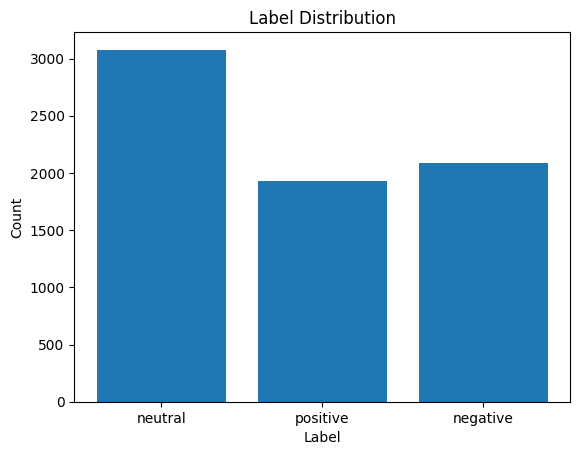

In [105]:
import matplotlib.pyplot as plt
# 标签分布可视化函数
def plot_label_distribution(labels, label_mapping):
    label_counts = [0] * len(label_mapping)
    for label in labels:
        label_counts[label_mapping[label[0]]] += 1

    label_names = list(label_mapping.keys())
    plt.bar(label_names, label_counts)
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.title('Label Distribution')
    plt.show()

# 可视化训练标签分布
plot_label_distribution(train_polarity_list, label_mapping)

In [106]:
print(len(train_token_list), len(train_aspect_list), len(train_polarity_list))
print(len(test_token_list), len(test_aspect_list), len(test_polarity_list))
print(len(val_token_list), len(val_aspect_list), len(val_polarity_list))
print(len(train_inputs), len(train_aspects), len(train_labels))
print(len(test_inputs), len(test_aspects), len(test_labels))
print(len(val_inputs), len(val_aspects), len(val_labels))


7090 7090 7090
901 901 901
888 888 888
7090 7090 7090
901 901 901
888 888 888


定义基于lstm的rnn


7. 创建数据加载器

In [107]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn.functional as F

设置损失函数


创建数据集

In [108]:
# 更新数据加载器
import torch
from torch.utils.data import Dataset, DataLoader

class AspectSentimentDataset(Dataset):
    def __init__(self, texts, aspects, labels):
        self.texts = texts
        self.aspects = [aspect[0] for aspect in aspects]
        self.labels = labels

        # 检查数据集长度是否一致
        assert len(self.texts) == len(self.aspects) == len(self.labels), "Dataset lengths are not equal!"

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        if idx >= len(self.texts):
            print(f"Index out of range: {idx}, Dataset length: {len(self.texts)}")
        return self.texts[idx], self.aspects[idx], self.labels[idx]

# 创建数据集和数据加载器
train_dataset = AspectSentimentDataset(train_inputs, train_aspects, train_labels)
val_dataset = AspectSentimentDataset(val_inputs, val_aspects, val_labels)
test_dataset = AspectSentimentDataset(test_inputs, test_aspects, test_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [109]:
# 获取词汇表大小
max_index = 0
for texts, aspects, labels in train_loader:
    max_index = max(max_index, texts.max().item(), aspects.max().item())  # Update max_index if current max is higher

vocab_size = max_index + 1

In [110]:
# 可删
# 打印前几个 batch 的数据以确认数据加载器是否正常工作
for batch_idx, (texts, aspects, labels) in enumerate(train_loader):
    print(f"Batch {batch_idx}: texts size: {texts.size()}, aspects size: {aspects.size()}, labels size: {labels.size()}")
    if batch_idx >= 1:  # 只打印前2个 batch 的数据
        break

Batch 0: texts size: torch.Size([32, 67]), aspects size: torch.Size([32]), labels size: torch.Size([32])
Batch 1: texts size: torch.Size([32, 67]), aspects size: torch.Size([32]), labels size: torch.Size([32])


没有注意力机制的模型


In [111]:
class RNNModelWithoutAttention(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers=1, device='cpu'):
        super(RNNModelWithoutAttention, self).__init__()
        self.device = device
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.text_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.aspect_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim * 2, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.to(device)

    def forward(self, texts, aspects):
        text_embedded = self.text_embedding(texts)  # [batch_size, seq_length, embedding_dim]
        aspect_embedded = self.aspect_embedding(aspects).unsqueeze(1)  # [batch_size, 1, embedding_dim]

        # 重复 aspect_embedded 以匹配 text_embedded 的序列长度
        aspect_embedded = aspect_embedded.repeat(1, text_embedded.size(1), 1)  # [batch_size, seq_length, embedding_dim]

        combined = torch.cat((text_embedded, aspect_embedded), dim=2)  # [batch_size, seq_length, embedding_dim * 2]
        rnn_outputs, _ = self.rnn(combined)  # [batch_size, seq_length, hidden_dim]
        output = self.fc(rnn_outputs[:, -1, :])  # [batch_size, output_dim]
        return output

有注意力机制的模型


In [112]:
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.hidden_dim = hidden_dim
        self.attention_weights_layer = nn.Linear(hidden_dim, 1)

    def forward(self, rnn_outputs):
        attention_scores = self.attention_weights_layer(rnn_outputs).squeeze(2)
        attention_weights = F.softmax(attention_scores, dim=1).unsqueeze(2)
        weighted_rnn_outputs = rnn_outputs * attention_weights
        context_vector = weighted_rnn_outputs.sum(dim=1)
        return context_vector, attention_weights

class RNNModelWithAttention(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers=1, device='cpu'):
        super(RNNModelWithAttention, self).__init__()
        self.device = device
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.text_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.aspect_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim * 2, hidden_dim, num_layers, batch_first=True)
        self.attention = Attention(hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.to(device)

    def forward(self, texts, aspects):
        text_embedded = self.text_embedding(texts)
        aspect_embedded = self.aspect_embedding(aspects).unsqueeze(1)
        aspect_embedded = aspect_embedded.repeat(1, text_embedded.size(1), 1)
        combined = torch.cat((text_embedded, aspect_embedded), dim=2)
        rnn_outputs, _ = self.rnn(combined)
        context_vector, attention_weights = self.attention(rnn_outputs)
        output = self.fc(context_vector)
        return output, attention_weights

双向LSTM


In [113]:
# 模型定义
class BiLSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers=1, device='cpu'):
        super(BiLSTMModel, self).__init__()
        self.device = device
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.text_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.aspect_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim * 2, hidden_dim, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        self.to(device)

    def forward(self, texts, aspects):
        text_embedded = self.text_embedding(texts)  # [batch_size, seq_length, embedding_dim]
        aspect_embedded = self.aspect_embedding(aspects).unsqueeze(1)  # [batch_size, 1, embedding_dim]

        # 重复 aspect_embedded 以匹配 text_embedded 的序列长度
        aspect_embedded = aspect_embedded.repeat(1, text_embedded.size(1), 1)  # [batch_size, seq_length, embedding_dim]

        combined = torch.cat((text_embedded, aspect_embedded), dim=2)  # [batch_size, seq_length, embedding_dim * 2]
        rnn_outputs, _ = self.rnn(combined)  # [batch_size, seq_length, hidden_dim * 2]
        output = self.fc(rnn_outputs[:, -1, :])  # [batch_size, output_dim]
        return output

In [114]:
# 创建两个模型实例
vocab_size = len(word_to_ix)
embedding_dim = 100
hidden_dim = 128
output_dim = 3
batch_size = 32
num_layers = 2

In [115]:
# 假设train_loader和test_loader已经定义并初始化
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [116]:
model_with_attention = RNNModelWithAttention(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, device=device)
model_without_attention = RNNModelWithoutAttention(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, device=device)
model_bilstm = BiLSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, device)


In [117]:
'''#可删
# 创建虚拟数据进行测试
batch_size = 2
seq_length = 10
texts = torch.randint(0, vocab_size, (batch_size, seq_length)).to(device)
aspects = torch.randint(0, vocab_size, (batch_size,)).to(device)

# 调用 forward 方法进行测试
model_with_attention(texts, aspects)'''

'#可删\n# 创建虚拟数据进行测试\nbatch_size = 2\nseq_length = 10\ntexts = torch.randint(0, vocab_size, (batch_size, seq_length)).to(device)\naspects = torch.randint(0, vocab_size, (batch_size,)).to(device)\n\n# 调用 forward 方法进行测试\nmodel_with_attention(texts, aspects)'

In [118]:
# 设定优化器和损失函数
optimizer_with_attention = optim.Adam(model_with_attention.parameters(), lr=0.001)
optimizer_without_attention = optim.Adam(model_without_attention.parameters(), lr=0.001)
optimizer_bilstm = optim.Adam(model_bilstm.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [119]:
# 定义评估函数
def evaluate_model(model, data_loader, criterion, device, attention=False):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    labels_list = []
    preds_list = []

    with torch.no_grad():
        for texts, aspects, labels in data_loader:
            texts, aspects, labels = texts.to(device), aspects.to(device), labels.to(device)
            if attention:
                outputs, _ = model(texts, aspects)  # 有注意力机制的模型返回两个值
            else:
                outputs = model(texts, aspects)  # 没有注意力机制的模型只返回一个值

            # 确保 outputs 是一个张量，而不是一个元组
            if isinstance(outputs, tuple):
                outputs = outputs[0]

            # 如果使用NLLLoss，应用log_softmax
            if isinstance(criterion, nn.NLLLoss):
                outputs = F.log_softmax(outputs, dim=1)

            loss = criterion(outputs, labels)
            total_loss += loss.item()

            preds = outputs.argmax(dim=1)
            correct_predictions += (preds == labels).sum().item()

            labels_list.extend(labels.cpu().numpy())
            preds_list.extend(preds.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    accuracy = correct_predictions / len(data_loader.dataset)
    return avg_loss, accuracy, labels_list, preds_list


In [120]:
# 定义训练函数
def train_model(model, optimizer, train_loader, val_loader, criterion, device, num_epochs=5, attention=False):
    model.train()
    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []

    all_attention_weights = []  # 用于存储所有注意力权重

    for epoch in range(num_epochs):
        total_loss = 0
        correct_predictions = 0
        for texts, aspects, labels in train_loader:
            texts, aspects, labels = texts.to(device), aspects.to(device), labels.to(device)
            optimizer.zero_grad()

            if attention:
                outputs, attention_weights = model(texts, aspects)
                all_attention_weights.append(attention_weights.detach().cpu().numpy())  # 保存注意力权重
            else:
                outputs = model(texts, aspects)

            # 如果使用NLLLoss，应用log_softmax
            if isinstance(criterion, nn.NLLLoss):
                outputs = F.log_softmax(outputs, dim=1)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            predictions = outputs.argmax(dim=1)
            correct_predictions += (predictions == labels).sum().item()

        avg_loss = total_loss / len(train_loader)
        accuracy = correct_predictions / len(train_loader.dataset)

        train_loss_history.append(avg_loss)
        train_acc_history.append(accuracy)

        # 验证模型
        val_loss, val_accuracy, _, _ = evaluate_model(model, val_loader, criterion, device, attention)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_accuracy)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_loss:.4f}, Train Accuracy: {accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    if attention:
        all_attention_weights = np.concatenate(all_attention_weights, axis=0)  # 合并所有 batch 的注意力权重
        return train_loss_history, val_loss_history, train_acc_history, val_acc_history, all_attention_weights
    else:
        return train_loss_history, val_loss_history, train_acc_history, val_acc_history


In [121]:
num_epochs = 5

# 训练带注意力机制的模型，并接收注意力权重
train_loss_history_with_attention, val_loss_history_with_attention, train_acc_history_with_attention, val_acc_history_with_attention, attention_weights_with_attention = train_model(
    model_with_attention, optimizer_with_attention, train_loader, val_loader, criterion, device, num_epochs, attention=True)


Epoch [1/5], Train Loss: 0.9260, Train Accuracy: 0.5882, Val Loss: 0.8956, Val Accuracy: 0.5541
Epoch [2/5], Train Loss: 0.8623, Train Accuracy: 0.6227, Val Loss: 0.8309, Val Accuracy: 0.6194
Epoch [3/5], Train Loss: 0.8128, Train Accuracy: 0.6506, Val Loss: 0.8020, Val Accuracy: 0.6430
Epoch [4/5], Train Loss: 0.7621, Train Accuracy: 0.6722, Val Loss: 0.7853, Val Accuracy: 0.6464
Epoch [5/5], Train Loss: 0.6860, Train Accuracy: 0.7076, Val Loss: 0.7751, Val Accuracy: 0.6633


In [122]:
# 训练不带注意力机制的模型
train_loss_history_without_attention, val_loss_history_without_attention, train_acc_history_without_attention, val_acc_history_without_attention = train_model(
    model_without_attention, optimizer_without_attention, train_loader, val_loader, criterion, device, num_epochs)

Epoch [1/5], Train Loss: 0.9327, Train Accuracy: 0.5865, Val Loss: 0.9224, Val Accuracy: 0.5991
Epoch [2/5], Train Loss: 0.9256, Train Accuracy: 0.5924, Val Loss: 0.9044, Val Accuracy: 0.5991
Epoch [3/5], Train Loss: 0.9241, Train Accuracy: 0.5924, Val Loss: 0.9077, Val Accuracy: 0.5991
Epoch [4/5], Train Loss: 0.9241, Train Accuracy: 0.5924, Val Loss: 0.9063, Val Accuracy: 0.5991
Epoch [5/5], Train Loss: 0.9234, Train Accuracy: 0.5917, Val Loss: 0.9023, Val Accuracy: 0.6025


In [123]:
# 训练双向LSTM模型
train_loss_history_bilstm, val_loss_history_bilstm, train_acc_history_bilstm, val_acc_history_bilstm = train_model(
    model_bilstm, optimizer_bilstm, train_loader, val_loader, criterion, device, num_epochs)

Epoch [1/5], Train Loss: 0.9342, Train Accuracy: 0.5831, Val Loss: 0.9115, Val Accuracy: 0.5991
Epoch [2/5], Train Loss: 0.9271, Train Accuracy: 0.5928, Val Loss: 0.9079, Val Accuracy: 0.5991
Epoch [3/5], Train Loss: 0.9256, Train Accuracy: 0.5924, Val Loss: 0.9079, Val Accuracy: 0.5991
Epoch [4/5], Train Loss: 0.9239, Train Accuracy: 0.5924, Val Loss: 0.9035, Val Accuracy: 0.5991
Epoch [5/5], Train Loss: 0.9241, Train Accuracy: 0.5910, Val Loss: 0.8999, Val Accuracy: 0.5991


In [124]:
'''# 预处理数据
train_token_list = pre_process(train_data)
test_token_list = pre_process(test_data)
val_token_list = pre_process(val_data)

# 确保所有样本长度一致
def pad_sentences(token_list, max_len, pad_token="<PAD>"):
    for i in range(len(token_list)):
        if len(token_list[i]) < max_len:
            token_list[i] += [pad_token] * (max_len - len(token_list[i]))
        else:
            token_list[i] = token_list[i][:max_len]
    return token_list

# 确保所有样本长度为 max_len
train_token_list = pad_sentences(train_token_list, max_len)
test_token_list = pad_sentences(test_token_list, max_len)
val_token_list = pad_sentences(val_token_list, max_len)

# 检查 `train_token_list` 的长度
print("Checking train_token_list lengths after padding:")
for i in range(5):
    print(f"Sample {i} length: {len(train_token_list[i])}")'''


'# 预处理数据\ntrain_token_list = pre_process(train_data)\ntest_token_list = pre_process(test_data)\nval_token_list = pre_process(val_data)\n\n# 确保所有样本长度一致\ndef pad_sentences(token_list, max_len, pad_token="<PAD>"):\n    for i in range(len(token_list)):\n        if len(token_list[i]) < max_len:\n            token_list[i] += [pad_token] * (max_len - len(token_list[i]))\n        else:\n            token_list[i] = token_list[i][:max_len]\n    return token_list\n\n# 确保所有样本长度为 max_len\ntrain_token_list = pad_sentences(train_token_list, max_len)\ntest_token_list = pad_sentences(test_token_list, max_len)\nval_token_list = pad_sentences(val_token_list, max_len)\n\n# 检查 `train_token_list` 的长度\nprint("Checking train_token_list lengths after padding:")\nfor i in range(5):\n    print(f"Sample {i} length: {len(train_token_list[i])}")'

In [125]:
'''# 不知道对不对 很怪
# 如果实验要用到就再改，如果实验没用到就删掉
import matplotlib.pyplot as plt
import numpy as np

# 定义可视化注意力权重的函数
def plot_attention_weights(attention_weights, sample_idx, tokens):
    # 将注意力权重转换为NumPy数组
    attention_weights = np.array(attention_weights)

    # 确保 attention_weights 形状为 [num_samples, seq_length, 1]
    print(f"Attention weights shape: {attention_weights.shape}")

    # 移除最后一维
    attention_weights = np.squeeze(attention_weights, axis=-1)

    # 获取第 sample_idx 个样本的注意力权重
    attention_scores = attention_weights[sample_idx]

    # 检查 tokens 的长度是否与注意力权重的长度一致
    if len(tokens) != attention_scores.shape[0]:
        print(f"Warning: Tokens length ({len(tokens)}) does not match attention weights length ({attention_scores.shape[0]}). Padding tokens with '<PAD>'.")

        # 补充或截断 tokens，使其长度与注意力权重的长度一致
        if len(tokens) < attention_scores.shape[0]:
            tokens += ['<PAD>'] * (attention_scores.shape[0] - len(tokens))
        else:
            tokens = tokens[:attention_scores.shape[0]]

    plt.figure(figsize=(10, 4))
    plt.bar(range(len(tokens)), attention_scores, tick_label=tokens)
    plt.xlabel('Tokens')
    plt.ylabel('Attention Score')
    plt.title('Attention Weights')
    plt.show()

# 确认注意力权重的形状
print(f"Attention weights shape: {attention_weights_with_attention.shape}")

# 选择一个样本进行可视化
sample_idx = 0  # 选择第一个样本
tokens = train_token_list[sample_idx]  # 获取对应的tokens

# 打印 tokens 的长度
print(f"Sample {sample_idx} tokens length: {len(tokens)}")

# 绘制注意力权重
plot_attention_weights(attention_weights_with_attention, sample_idx, tokens)

# 再次检查 `train_token_list` 的长度
print("After visualization:")
for i in range(5):
    print(f"Sample {i} length: {len(train_token_list[i])}")'''


'# 不知道对不对 很怪\n# 如果实验要用到就再改，如果实验没用到就删掉\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# 定义可视化注意力权重的函数\ndef plot_attention_weights(attention_weights, sample_idx, tokens):\n    # 将注意力权重转换为NumPy数组\n    attention_weights = np.array(attention_weights)\n\n    # 确保 attention_weights 形状为 [num_samples, seq_length, 1]\n    print(f"Attention weights shape: {attention_weights.shape}")\n\n    # 移除最后一维\n    attention_weights = np.squeeze(attention_weights, axis=-1)\n\n    # 获取第 sample_idx 个样本的注意力权重\n    attention_scores = attention_weights[sample_idx]\n\n    # 检查 tokens 的长度是否与注意力权重的长度一致\n    if len(tokens) != attention_scores.shape[0]:\n        print(f"Warning: Tokens length ({len(tokens)}) does not match attention weights length ({attention_scores.shape[0]}). Padding tokens with \'<PAD>\'.")\n\n        # 补充或截断 tokens，使其长度与注意力权重的长度一致\n        if len(tokens) < attention_scores.shape[0]:\n            tokens += [\'<PAD>\'] * (attention_scores.shape[0] - len(tokens))\n        else:\n            

In [126]:
# 保存模型
torch.save(model_with_attention.state_dict(), 'model_with_attention.pth')
torch.save(model_without_attention.state_dict(), 'model_without_attention.pth')
torch.save(model_bilstm.state_dict(), 'model_bilstm.pth')

In [127]:
"""# 设定不同的优化器和学习率
optimizer_options = {
    'adam': torch.optim.Adam(model.parameters(), lr=0.001),
    'sgd': torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
}

# 选择优化器
optimizer = optimizer_options['adam']  # 可以动态更改为 'sgd'
# adam和sgd优化器得出的 Test Loss 和 Test Accuracy 差不多，所以选哪个都可以。Adam通常比SGD收敛更快，SGD通常被认为在大规模数据集上有更好的泛化性，Adam会占用更多的内存。
# 然后我又改过了，我现在也不确定adam和sgd哪个更好了
# 不知道能不能用GridSearchCV，这样既可以选lr又可以选optimizer，还可以选num_layers,可以直接得出最好的参数
# 但lr能调的思路是对的，就是还没写上去"""


"# 设定不同的优化器和学习率\noptimizer_options = {\n    'adam': torch.optim.Adam(model.parameters(), lr=0.001),\n    'sgd': torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)\n}\n\n# 选择优化器\noptimizer = optimizer_options['adam']  # 可以动态更改为 'sgd'\n# adam和sgd优化器得出的 Test Loss 和 Test Accuracy 差不多，所以选哪个都可以。Adam通常比SGD收敛更快，SGD通常被认为在大规模数据集上有更好的泛化性，Adam会占用更多的内存。\n# 然后我又改过了，我现在也不确定adam和sgd哪个更好了\n# 不知道能不能用GridSearchCV，这样既可以选lr又可以选optimizer，还可以选num_layers,可以直接得出最好的参数\n# 但lr能调的思路是对的，就是还没写上去"

In [128]:
# 创建新的模型实例
loaded_model_with_attention = RNNModelWithAttention(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, device=device)
loaded_model_without_attention = RNNModelWithoutAttention(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, device=device)
loaded_model_bilstm = BiLSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, device=device)

# 加载模型权重
loaded_model_with_attention.load_state_dict(torch.load('model_with_attention.pth'))
loaded_model_without_attention.load_state_dict(torch.load('model_without_attention.pth'))
loaded_model_bilstm.load_state_dict(torch.load('model_bilstm.pth'))

# 将模型移动到相应设备
loaded_model_with_attention.to(device)
loaded_model_without_attention.to(device)
loaded_model_bilstm.to(device)

BiLSTMModel(
  (text_embedding): Embedding(51903, 100)
  (aspect_embedding): Embedding(51903, 100)
  (rnn): LSTM(200, 128, num_layers=2, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=256, out_features=3, bias=True)
)

In [129]:
# 评估模型
loss_with_attention, acc_with_attention, labels_with_attention, preds_with_attention = evaluate_model(loaded_model_with_attention, test_loader, criterion, device, attention=True)
loss_without_attention, acc_without_attention, labels_without_attention, preds_without_attention = evaluate_model(loaded_model_without_attention, test_loader, criterion, device)
loss_bilstm, acc_bilstm, labels_bilstm, preds_bilstm = evaluate_model(loaded_model_bilstm, test_loader, criterion, device)

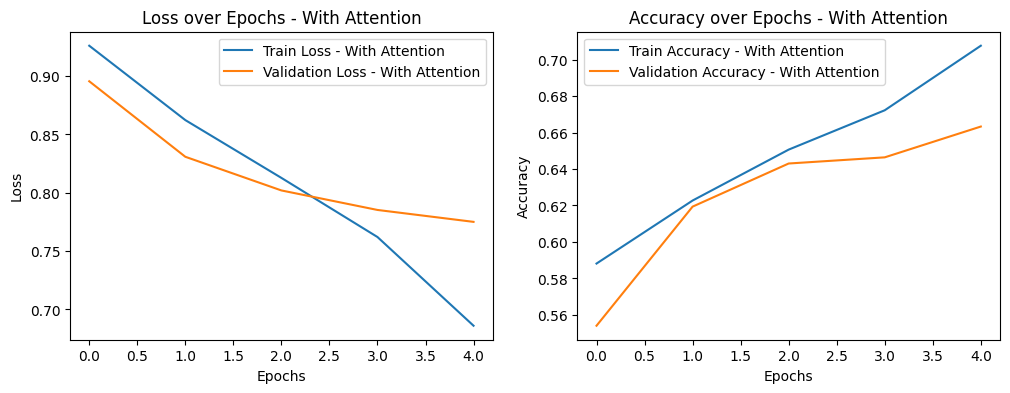

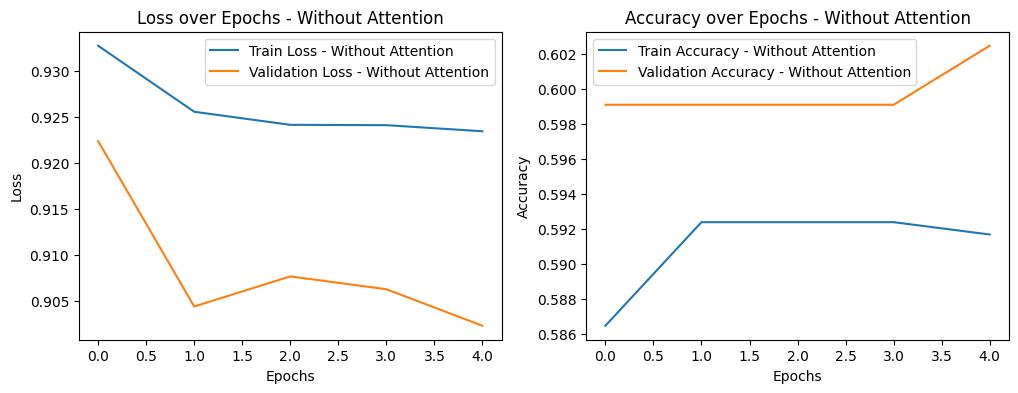

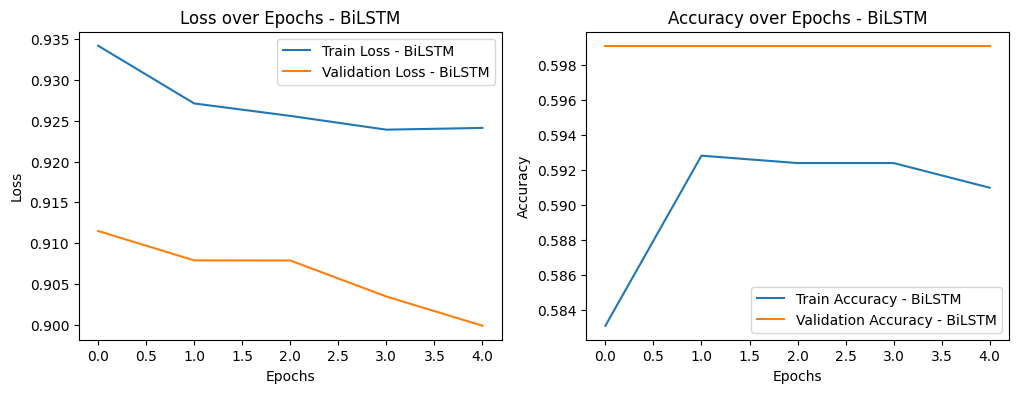

In [130]:
import matplotlib.pyplot as plt

# 定义训练过程的绘图函数
def plot_training_history(train_loss_history, val_loss_history, train_acc_history, val_acc_history, model_name):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_loss_history, label=f'Train Loss - {model_name}')
    plt.plot(val_loss_history, label=f'Validation Loss - {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss over Epochs - {model_name}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_acc_history, label=f'Train Accuracy - {model_name}')
    plt.plot(val_acc_history, label=f'Validation Accuracy - {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy over Epochs - {model_name}')
    plt.legend()

    plt.show()

# 绘制每个模型的训练过程历史图
plot_training_history(train_loss_history_with_attention, val_loss_history_with_attention, train_acc_history_with_attention, val_acc_history_with_attention, 'With Attention')
plot_training_history(train_loss_history_without_attention, val_loss_history_without_attention, train_acc_history_without_attention, val_acc_history_without_attention, 'Without Attention')
plot_training_history(train_loss_history_bilstm, val_loss_history_bilstm, train_acc_history_bilstm, val_acc_history_bilstm, 'BiLSTM')

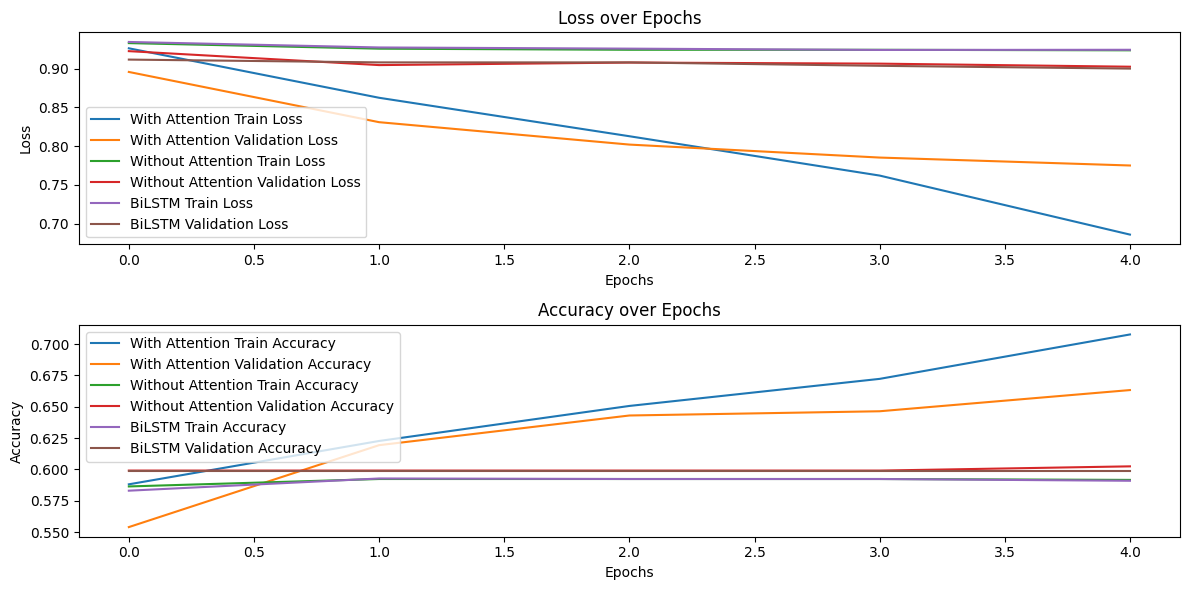

In [131]:
def plot_model_performance(train_loss_histories, val_loss_histories, train_acc_histories, val_acc_histories, model_names):
    plt.figure(figsize=(12, 6))

    for i, model_name in enumerate(model_names):
        plt.subplot(2, 1, 1)
        plt.plot(train_loss_histories[i], label=f'{model_name} Train Loss')
        plt.plot(val_loss_histories[i], label=f'{model_name} Validation Loss')

        plt.subplot(2, 1, 2)
        plt.plot(train_acc_histories[i], label=f'{model_name} Train Accuracy')
        plt.plot(val_acc_histories[i], label=f'{model_name} Validation Accuracy')

    plt.subplot(2, 1, 1)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 模型名称
model_names = ['With Attention', 'Without Attention', 'BiLSTM']

# 绘制性能比较图
plot_model_performance(
    [train_loss_history_with_attention, train_loss_history_without_attention, train_loss_history_bilstm],
    [val_loss_history_with_attention, val_loss_history_without_attention, val_loss_history_bilstm],
    [train_acc_history_with_attention, train_acc_history_without_attention, train_acc_history_bilstm],
    [val_acc_history_with_attention, val_acc_history_without_attention, val_acc_history_bilstm],
    model_names
)



In [132]:
# 打印分类报告
print("Model with Attention:")
print(classification_report(labels_with_attention, preds_with_attention))
print("Model without Attention:")
print(classification_report(labels_without_attention, preds_without_attention))
print("BiLSTM Model:")
print(classification_report(labels_bilstm, preds_bilstm))

Model with Attention:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       393
           1       0.57      0.46      0.51       245
           2       0.62      0.62      0.62       263

    accuracy                           0.66       901
   macro avg       0.64      0.63      0.63       901
weighted avg       0.66      0.66      0.66       901

Model without Attention:
              precision    recall  f1-score   support

           0       0.60      0.90      0.72       393
           1       0.41      0.05      0.09       245
           2       0.56      0.60      0.58       263

    accuracy                           0.58       901
   macro avg       0.52      0.52      0.47       901
weighted avg       0.54      0.58      0.51       901

BiLSTM Model:
              precision    recall  f1-score   support

           0       0.59      0.94      0.73       393
           1       0.41      0.05      0.09       245
           2  

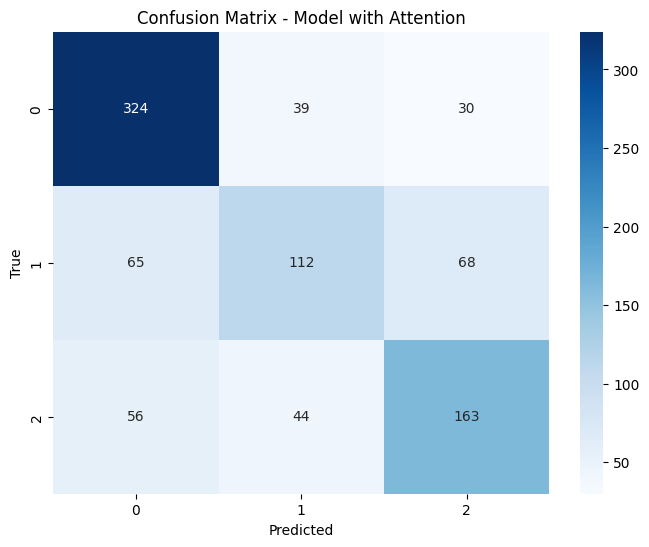

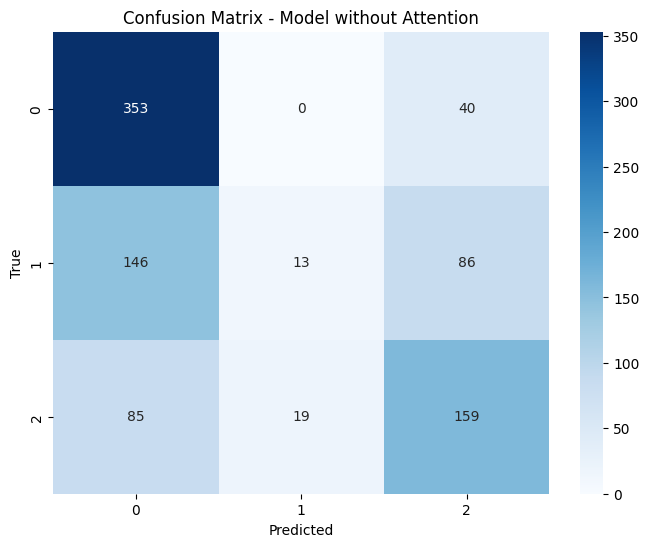

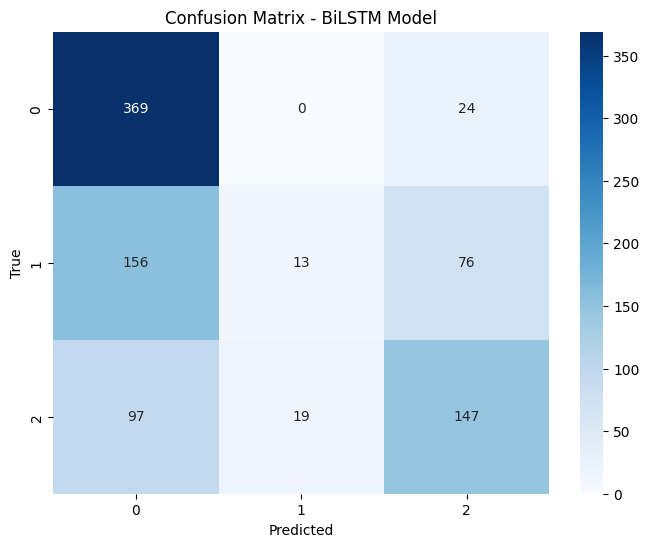

In [133]:
# 可视化混淆矩阵
def plot_confusion_matrix(labels, preds, title):
    cm = confusion_matrix(labels, preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(labels_with_attention, preds_with_attention, "Confusion Matrix - Model with Attention")
plot_confusion_matrix(labels_without_attention, preds_without_attention, "Confusion Matrix - Model without Attention")
plot_confusion_matrix(labels_bilstm, preds_bilstm, "Confusion Matrix - BiLSTM Model")


In [134]:
'''import torch
import plotly.express as px

# 创建 ix_to_word 字典
ix_to_word = {v: k for k, v in word_to_ix.items()}

# 可视化函数
def visualize_attention_interactive(text_ids, weights, ix_to_word):
    text = [ix_to_word.get(id, '<UNK>') for id in text_ids]
    weights = weights.squeeze().cpu().detach().numpy()

    fig = px.imshow([weights], labels=dict(color="Attention Weight"), x=text)
    fig.update_xaxes(side="top")
    fig.show()

# 使用模型进行评估
model.eval()
with torch.no_grad():
    for texts, aspects, labels in DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0):
        texts, aspects, labels = texts.to(device), aspects.to(device), labels.to(device)
        outputs, weights = model(texts, aspects)
        if weights is not None:
            # 只显示第一个batch的前五个样本
            for i in range(min(5, len(texts))):
                text_sample = texts[i].tolist()
                weight_sample = weights[i]
                visualize_attention_interactive(text_sample, weight_sample, ix_to_word)
            break  # 只显示第一个batch

# 检查训练和测试数据集中的所有词汇是否在词汇表中
def validate_word_index(data_list, word_to_ix):
    for sent in data_list:
        for word in sent:
            if word not in word_to_ix:
                print(f"Word '{word}' not in vocabulary")

validate_word_index(train_token_list, word_to_ix)
validate_word_index(test_token_list, word_to_ix)
validate_word_index(output_train_polarity_list, word_to_ix)
validate_word_index(output_test_polarity_list, word_to_ix)'''


'import torch\nimport plotly.express as px\n\n# 创建 ix_to_word 字典\nix_to_word = {v: k for k, v in word_to_ix.items()}\n\n# 可视化函数\ndef visualize_attention_interactive(text_ids, weights, ix_to_word):\n    text = [ix_to_word.get(id, \'<UNK>\') for id in text_ids]\n    weights = weights.squeeze().cpu().detach().numpy()\n\n    fig = px.imshow([weights], labels=dict(color="Attention Weight"), x=text)\n    fig.update_xaxes(side="top")\n    fig.show()\n\n# 使用模型进行评估\nmodel.eval()\nwith torch.no_grad():\n    for texts, aspects, labels in DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0):\n        texts, aspects, labels = texts.to(device), aspects.to(device), labels.to(device)\n        outputs, weights = model(texts, aspects)\n        if weights is not None:\n            # 只显示第一个batch的前五个样本\n            for i in range(min(5, len(texts))):\n                text_sample = texts[i].tolist()\n                weight_sample = weights[i]\n                visualize_attention_interactive

training process


Experience

In [135]:

# 超参数设置
# 除了学习率（lr）和优化器之外，还可以修改以下超参数进行实验：

# 嵌入维度（embedding_dim）：调整嵌入层的维度可以影响模型对词汇的表示能力。
# 隐藏层维度（hidden_dim）：调整编码器和解码器RNN隐藏层的维度可以改变模型的复杂度和表达能力。
# 批量大小（batch_size）：调整批量大小可以影响模型的训练速度和泛化能力。
# 训练周期数（num_epochs）：调整训练周期数可以控制模型训练的总时长。
# 可供选择的lr与优化器
#learning_rates = [0.01, 0.001, 0.0001]
#optimizers = [Adam,SGD]




# Testing

3.5 Experiments
This section should contain: Dataset Description describe the dataset and include any dataset analysis you have done.
这一栏代码应该可以放到最上面去（都行）

In [136]:
import torch
from torch.utils.data import Dataset, DataLoader
from collections import Counter

def dataset_description(dataset, name):
    print(f"Dataset: {name}")
    print(f"Number of samples: {len(dataset)}")
    sample_texts, sample_aspects, sample_labels = next(iter(DataLoader(dataset, batch_size=5)))
    print(f"Sample texts: {sample_texts}")
    print(f"Sample aspects: {sample_aspects}")
    print(f"Sample labels: {sample_labels}")
    print(f"Label distribution: {Counter([label.item() for _, _, label in dataset])}")

dataset_description(train_dataset, "Train Dataset")
dataset_description(val_dataset, "Validation Dataset")
dataset_description(test_dataset, "Test Dataset")

Dataset: Train Dataset
Number of samples: 7090
Sample texts: tensor([[   24,   418,    34,     4,   258,  3166,   139,   569,    45,    37,
            44,    10,     4,   241,   104,    87,    85,    36,   226,     8,
             4, 14832,  3945,  4350,    50,     4,  2641,    24,    98,    34,
           124,     4,   245,    14,    85,     2,     2,     2,     2,     2,
             2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
             2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
             2,     2,     2,     2,     2,     2,     2],
        [   24,   418,    34,     4,   258,  3166,   139,   569,    45,    37,
            44,    10,     4,   241,   104,    87,    85,    36,   226,     8,
             4, 14832,  3945,  4350,    50,     4,  2641,    24,    98,    34,
           124,     4,   245,    14,    85,     2,     2,     2,     2,     2,
             2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
           

选逐步优化（网格搜索grid search,超参数优化），而不是联合优化，尽管每个超参数的最佳值可能会受其他超参数的影响，但运行效率太低，耗费时间过长

In [137]:
# 定义超参数
learning_rates = [0.01, 0.001, 0.0001]
optimizers = ['Adam', 'SGD']
num_epochs_list = [5, 10]
batch_sizes = [32, 64]
criterion_list = [nn.CrossEntropyLoss(), nn.NLLLoss()]
embedding_dims = [100, 200]
hidden_dims = [128, 256]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [172]:
# 使用子集进行快速验证
def get_subset(dataset, ratio=0.1):
    subset_size = int(len(dataset) * ratio)
    indices = np.random.choice(len(dataset), subset_size, replace=False)
    return Subset(dataset, indices)

# 提前停止
class EarlyStopping:
    def __init__(self, patience=3):
        self.patience = patience
        self.best_loss = float('inf')
        self.counter = 0

    def step(self, loss):
        if loss < self.best_loss:
            self.best_loss = loss
            self.counter = 0
            return False
        else:
            self.counter += 1
            if self.counter >= self.patience:
                return True
            else:
                return False

In [139]:
'''def run_experiment(model_class, model_name, attention=False):
    for lr in learning_rates:
        for opt in optimizers:
            for num_epochs in num_epochs_list:
                for batch_size in batch_sizes:
                    for criterion in criterion_list:
                        for embedding_dim in embedding_dims:
                            for hidden_dim in hidden_dims:
                                # 使用子集进行快速验证
                                train_subset = get_subset(train_dataset, ratio=0.1)
                                val_subset = get_subset(val_dataset, ratio=0.1)
                                test_subset = get_subset(test_dataset, ratio=0.1)

                                train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
                                val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
                                test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)

                                # 初始化模型
                                model = model_class(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, device=device)

                                # 选择优化器
                                if opt == 'Adam':
                                    optimizer = optim.Adam(model.parameters(), lr=lr)
                                elif opt == 'SGD':
                                    optimizer = optim.SGD(model.parameters(), lr=lr)

                                print(f"Training {model_name} with learning rate {lr}, optimizer {opt}, num_epochs {num_epochs}, batch_size {batch_size}, criterion {criterion.__class__.__name__}, embedding_dim {embedding_dim}, hidden_dim {hidden_dim}")

                                # 训练模型
                                early_stopping = EarlyStopping(patience=3)
                                for epoch in range(num_epochs):
                                    if attention:
                                        train_loss, train_acc, _, _, _ = train_model(
                                            model, optimizer, train_loader, val_loader, criterion, device, num_epochs=1, attention=attention)
                                    else:
                                        train_loss, train_acc, _, _ = train_model(
                                            model, optimizer, train_loader, val_loader, criterion, device, num_epochs=1, attention=attention)

                                    val_loss, val_acc, _, _ = evaluate_model(model, val_loader, criterion, device, attention=attention)

                                    if early_stopping.step(val_loss):
                                        print(f"Early stopping at epoch {epoch+1}")
                                        break

                                # 评估模型
                                test_loss, test_accuracy, labels, preds = evaluate_model(model, test_loader, criterion, device, attention=attention)

                                results.append({
                                    'model': model_name,
                                    'learning_rate': lr,
                                    'optimizer': opt,
                                    'num_epochs': num_epochs,
                                    'batch_size': batch_size,
                                    'criterion': criterion.__class__.__name__,
                                    'embedding_dim': embedding_dim,
                                    'hidden_dim': hidden_dim,
                                    'train_loss': train_loss,
                                    'val_loss': val_loss,
                                    'train_acc': train_acc,
                                    'val_acc': val_acc,
                                    'test_loss': test_loss,
                                    'test_accuracy': test_accuracy
                                })

                                print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")'''

'def run_experiment(model_class, model_name, attention=False):\n    for lr in learning_rates:\n        for opt in optimizers:\n            for num_epochs in num_epochs_list:\n                for batch_size in batch_sizes:\n                    for criterion in criterion_list:\n                        for embedding_dim in embedding_dims:\n                            for hidden_dim in hidden_dims:\n                                # 使用子集进行快速验证\n                                train_subset = get_subset(train_dataset, ratio=0.1)\n                                val_subset = get_subset(val_dataset, ratio=0.1)\n                                test_subset = get_subset(test_dataset, ratio=0.1)\n\n                                train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)\n                                val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)\n                                test_loader = DataLoader(test_subset, batch_size=batch_

In [173]:
results = []

def run_experiment_step(model_class, model_name, attention=False, step="lr"):
    if step == "lr":
        hyperparameters = learning_rates
        hyper_name = "learning_rate"
    elif step == "optimizer":
        hyperparameters = optimizers
        hyper_name = "optimizer"
    elif step == "batch_size":
        hyperparameters = batch_sizes
        hyper_name = "batch_size"
    elif step == "embedding_dim":
        hyperparameters = embedding_dims
        hyper_name = "embedding_dim"
    elif step == "hidden_dim":
        hyperparameters = hidden_dims
        hyper_name = "hidden_dim"
    elif step == "num_epochs":
        hyperparameters = num_epochs_list
        hyper_name = "num_epochs"
    elif step == "criterion":
        hyperparameters = criterion_list
        hyper_name = "criterion"
    else:
        raise ValueError(f"Unsupported step: {step}")

    best_param = None
    best_accuracy = 0

    for param in hyperparameters:
        if step == "lr":
            lr = param
            optimizer_param = 'Adam'
            num_epochs = 5
            batch_size = 32
            criterion = nn.CrossEntropyLoss()
            embedding_dim = 100
            hidden_dim = 128
        elif step == "optimizer":
            lr = 0.001
            optimizer_param = param
            num_epochs = 5
            batch_size = 32
            criterion = nn.CrossEntropyLoss()
            embedding_dim = 100
            hidden_dim = 128
        elif step == "batch_size":
            lr = 0.001
            optimizer_param = 'Adam'
            num_epochs = 5
            batch_size = param
            criterion = nn.CrossEntropyLoss()
            embedding_dim = 100
            hidden_dim = 128
        elif step == "embedding_dim":
            lr = 0.001
            optimizer_param = 'Adam'
            num_epochs = 5
            batch_size = 32
            criterion = nn.CrossEntropyLoss()
            embedding_dim = param
            hidden_dim = 128
        elif step == "hidden_dim":
            lr = 0.001
            optimizer_param = 'Adam'
            num_epochs = 5
            batch_size = 32
            criterion = nn.CrossEntropyLoss()
            embedding_dim = 100
            hidden_dim = param
        elif step == "num_epochs":
            lr = 0.001
            optimizer_param = 'Adam'
            num_epochs = param
            batch_size = 32
            criterion = nn.CrossEntropyLoss()
            embedding_dim = 100
            hidden_dim = 128
        elif step == "criterion":
            lr = 0.001
            optimizer_param = 'Adam'
            num_epochs = 5
            batch_size = 32
            criterion = param
            embedding_dim = 100
            hidden_dim = 128

        # 使用子集进行快速验证
        train_subset = get_subset(train_dataset, ratio=0.1)
        val_subset = get_subset(val_dataset, ratio=0.1)
        test_subset = get_subset(test_dataset, ratio=0.1)

        train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
        test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)

        # 初始化模型
        model = model_class(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, device=device)

        # 选择优化器
        if optimizer_param == 'Adam':
            optimizer = optim.Adam(model.parameters(), lr=lr)
        elif optimizer_param == 'SGD':
            optimizer = optim.SGD(model.parameters(), lr=lr)

        print(f"Training {model_name} with {hyper_name} {param}, optimizer {optimizer_param}, num_epochs {num_epochs}, batch_size {batch_size}, criterion {criterion.__class__.__name__}, embedding_dim {embedding_dim}, hidden_dim {hidden_dim}")

        # 训练模型
        early_stopping = EarlyStopping(patience=3)
        if attention:
            train_loss, val_loss, train_acc, val_acc, _ = train_model(
                model, optimizer, train_loader, val_loader, criterion, device, num_epochs=num_epochs, attention=attention)
        else:
            train_loss, val_loss, train_acc, val_acc = train_model(
                model, optimizer, train_loader, val_loader, criterion, device, num_epochs=num_epochs, attention=attention)

        # 评估模型
        test_loss, test_accuracy, labels, preds = evaluate_model(model, test_loader, criterion, device, attention=attention)

        results.append({
            'model': model_name,
            'hyper_name': hyper_name,
            hyper_name: param,
            'learning_rate': lr,
            'optimizer': optimizer_param,
            'num_epochs': num_epochs,
            'batch_size': batch_size,
            'criterion': criterion.__class__.__name__,
            'embedding_dim': embedding_dim,
            'hidden_dim': hidden_dim,
            'train_loss': train_loss,
            'val_loss': val_loss,
            'train_acc': train_acc,
            'val_acc': val_acc,
            'test_loss': test_loss,
            'test_accuracy': test_accuracy
        })

        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_param = param

    print(f"Best {hyper_name} for {model_name}: {best_param} with accuracy {best_accuracy:.4f}")
    return best_param

In [174]:
# 逐步优化每个超参数
def optimize_model(model_class, model_name, attention):
    best_lr = run_experiment_step(model_class, model_name, attention=attention, step="lr")
    best_optimizer = run_experiment_step(model_class, model_name, attention=attention, step="optimizer")
    best_batch_size = run_experiment_step(model_class, model_name, attention=attention, step="batch_size")
    best_embedding_dim = run_experiment_step(model_class, model_name, attention=attention, step="embedding_dim")
    best_hidden_dim = run_experiment_step(model_class, model_name, attention=attention, step="hidden_dim")
    best_num_epochs = run_experiment_step(model_class, model_name, attention=attention, step="num_epochs")
    best_criterion = run_experiment_step(model_class, model_name, attention=attention, step="criterion")

    return best_lr, best_optimizer, best_batch_size, best_embedding_dim, best_hidden_dim, best_num_epochs, best_criterion

In [175]:
# 运行实验并优化每个模型
print("Optimizing RNNModelWithAttention")
optimize_model(RNNModelWithAttention, "RNNModelWithAttention", attention=True)

Optimizing RNNModelWithAttention
Training RNNModelWithAttention with learning_rate 0.01, optimizer Adam, num_epochs 5, batch_size 32, criterion CrossEntropyLoss, embedding_dim 100, hidden_dim 128
Epoch [1/5], Train Loss: 1.0066, Train Accuracy: 0.5543, Val Loss: 0.9306, Val Accuracy: 0.6136
Epoch [2/5], Train Loss: 0.9535, Train Accuracy: 0.5994, Val Loss: 0.9269, Val Accuracy: 0.6364
Epoch [3/5], Train Loss: 0.9090, Train Accuracy: 0.6135, Val Loss: 0.8889, Val Accuracy: 0.6364
Epoch [4/5], Train Loss: 0.8605, Train Accuracy: 0.6276, Val Loss: 0.9375, Val Accuracy: 0.6591
Epoch [5/5], Train Loss: 0.7742, Train Accuracy: 0.6897, Val Loss: 0.9989, Val Accuracy: 0.5568
Test Loss: 0.9037, Test Accuracy: 0.6222
Training RNNModelWithAttention with learning_rate 0.001, optimizer Adam, num_epochs 5, batch_size 32, criterion CrossEntropyLoss, embedding_dim 100, hidden_dim 128
Epoch [1/5], Train Loss: 0.9857, Train Accuracy: 0.5740, Val Loss: 0.9120, Val Accuracy: 0.5682
Epoch [2/5], Train Loss

(0.01, 'Adam', 32, 200, 256, 10, CrossEntropyLoss())

In [176]:
print("Optimizing RNNModelWithoutAttention")
optimize_model(RNNModelWithoutAttention, "RNNModelWithoutAttention", attention=False)


Optimizing RNNModelWithoutAttention
Training RNNModelWithoutAttention with learning_rate 0.01, optimizer Adam, num_epochs 5, batch_size 32, criterion CrossEntropyLoss, embedding_dim 100, hidden_dim 128
Epoch [1/5], Train Loss: 1.0004, Train Accuracy: 0.5614, Val Loss: 0.8527, Val Accuracy: 0.6705
Epoch [2/5], Train Loss: 0.9480, Train Accuracy: 0.5910, Val Loss: 0.8402, Val Accuracy: 0.6932
Epoch [3/5], Train Loss: 0.9070, Train Accuracy: 0.6206, Val Loss: 0.8280, Val Accuracy: 0.6932
Epoch [4/5], Train Loss: 0.8978, Train Accuracy: 0.6206, Val Loss: 0.8291, Val Accuracy: 0.6932
Epoch [5/5], Train Loss: 0.8871, Train Accuracy: 0.6150, Val Loss: 0.8325, Val Accuracy: 0.6932
Test Loss: 0.8880, Test Accuracy: 0.6111
Training RNNModelWithoutAttention with learning_rate 0.001, optimizer Adam, num_epochs 5, batch_size 32, criterion CrossEntropyLoss, embedding_dim 100, hidden_dim 128
Epoch [1/5], Train Loss: 0.9954, Train Accuracy: 0.5233, Val Loss: 0.8993, Val Accuracy: 0.6136
Epoch [2/5], T

(0.01, 'Adam', 32, 100, 128, 10, NLLLoss())

In [177]:
print("Optimizing BiLSTMModel")
optimize_model(BiLSTMModel, "BiLSTMModel", attention=False)

Optimizing BiLSTMModel
Training BiLSTMModel with learning_rate 0.01, optimizer Adam, num_epochs 5, batch_size 32, criterion CrossEntropyLoss, embedding_dim 100, hidden_dim 128
Epoch [1/5], Train Loss: 1.0033, Train Accuracy: 0.5289, Val Loss: 0.8869, Val Accuracy: 0.6023
Epoch [2/5], Train Loss: 0.9504, Train Accuracy: 0.5585, Val Loss: 0.8572, Val Accuracy: 0.6477
Epoch [3/5], Train Loss: 0.9530, Train Accuracy: 0.5444, Val Loss: 0.9317, Val Accuracy: 0.6023
Epoch [4/5], Train Loss: 0.9449, Train Accuracy: 0.5712, Val Loss: 0.8924, Val Accuracy: 0.6250
Epoch [5/5], Train Loss: 0.9432, Train Accuracy: 0.5698, Val Loss: 0.8649, Val Accuracy: 0.6250
Test Loss: 0.9390, Test Accuracy: 0.5333
Training BiLSTMModel with learning_rate 0.001, optimizer Adam, num_epochs 5, batch_size 32, criterion CrossEntropyLoss, embedding_dim 100, hidden_dim 128
Epoch [1/5], Train Loss: 0.9928, Train Accuracy: 0.5233, Val Loss: 0.8927, Val Accuracy: 0.6364
Epoch [2/5], Train Loss: 0.9435, Train Accuracy: 0.57

(0.001, 'Adam', 32, 200, 256, 5, CrossEntropyLoss())

In [178]:
# 输出实验结果
df_results = pd.DataFrame(results)
print(df_results)

                       model     hyper_name  learning_rate optimizer  \
0      RNNModelWithAttention  learning_rate         0.0100      Adam   
1      RNNModelWithAttention  learning_rate         0.0010      Adam   
2      RNNModelWithAttention  learning_rate         0.0001      Adam   
3      RNNModelWithAttention      optimizer         0.0010      Adam   
4      RNNModelWithAttention      optimizer         0.0010       SGD   
5      RNNModelWithAttention     batch_size         0.0010      Adam   
6      RNNModelWithAttention     batch_size         0.0010      Adam   
7      RNNModelWithAttention  embedding_dim         0.0010      Adam   
8      RNNModelWithAttention  embedding_dim         0.0010      Adam   
9      RNNModelWithAttention     hidden_dim         0.0010      Adam   
10     RNNModelWithAttention     hidden_dim         0.0010      Adam   
11     RNNModelWithAttention     num_epochs         0.0010      Adam   
12     RNNModelWithAttention     num_epochs         0.0010      

In [146]:
'''for result in results:
    model_name = result['model']
    lr = result['learning_rate']
    opt = result['optimizer']
    num_epochs = result['num_epochs']
    batch_size = result['batch_size']
    criterion_name = result['criterion']
    embedding_dim = result['embedding_dim']
    hidden_dim = result['hidden_dim']
    train_loss = result['train_loss']
    val_loss = result['val_loss']
    train_acc = result['train_acc']
    val_acc = result['val_acc']

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.title(f'{model_name} Loss - LR: {lr}, Opt: {opt}, Epochs: {num_epochs}, Batch Size: {batch_size}, Criterion: {criterion_name}, Embedding Dim: {embedding_dim}, Hidden Dim: {hidden_dim}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train Accuracy')
    plt.plot(val_acc, label='Val Accuracy')
    plt.title(f'{model_name} Accuracy - LR: {lr}, Opt: {opt}, Epochs: {num_epochs}, Batch Size: {batch_size}, Criterion: {criterion_name}, Embedding Dim: {embedding_dim}, Hidden Dim: {hidden_dim}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()'''

"for result in results:\n    model_name = result['model']\n    lr = result['learning_rate']\n    opt = result['optimizer']\n    num_epochs = result['num_epochs']\n    batch_size = result['batch_size']\n    criterion_name = result['criterion']\n    embedding_dim = result['embedding_dim']\n    hidden_dim = result['hidden_dim']\n    train_loss = result['train_loss']\n    val_loss = result['val_loss']\n    train_acc = result['train_acc']\n    val_acc = result['val_acc']\n\n    plt.figure(figsize=(12, 5))\n\n    plt.subplot(1, 2, 1)\n    plt.plot(train_loss, label='Train Loss')\n    plt.plot(val_loss, label='Val Loss')\n    plt.title(f'{model_name} Loss - LR: {lr}, Opt: {opt}, Epochs: {num_epochs}, Batch Size: {batch_size}, Criterion: {criterion_name}, Embedding Dim: {embedding_dim}, Hidden Dim: {hidden_dim}')\n    plt.xlabel('Epoch')\n    plt.ylabel('Loss')\n    plt.legend()\n\n    plt.subplot(1, 2, 2)\n    plt.plot(train_acc, label='Train Accuracy')\n    plt.plot(val_acc, label='Val Accur

train_loss: [1.006615400314331, 0.9535137959148573, 0.9090334254762401, 0.8605422584906869, 0.7742362100145092]
val_loss: [0.9305819272994995, 0.9268628160158793, 0.8889002203941345, 0.9375433921813965, 0.9989171226819357]
train_acc: [0.5543018335684062, 0.5994358251057827, 0.613540197461213, 0.6276445698166432, 0.689703808180536]
val_acc: [0.6136363636363636, 0.6363636363636364, 0.6363636363636364, 0.6590909090909091, 0.5568181818181818]


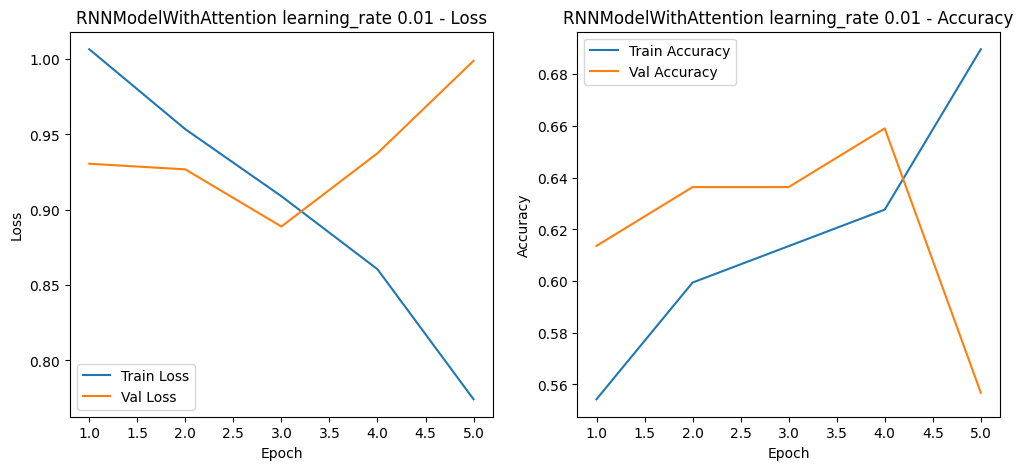

train_loss: [0.9856741843016251, 0.953166267146235, 0.9352727247321088, 0.907679752163265, 0.9054053840429886]
val_loss: [0.9120480219523112, 0.9327324231465658, 0.9220701654752096, 0.912945826848348, 0.9154836734135946]
train_acc: [0.5740479548660085, 0.5740479548660085, 0.6036671368124118, 0.609308885754584, 0.607898448519041]
val_acc: [0.5681818181818182, 0.5681818181818182, 0.5681818181818182, 0.5681818181818182, 0.5681818181818182]


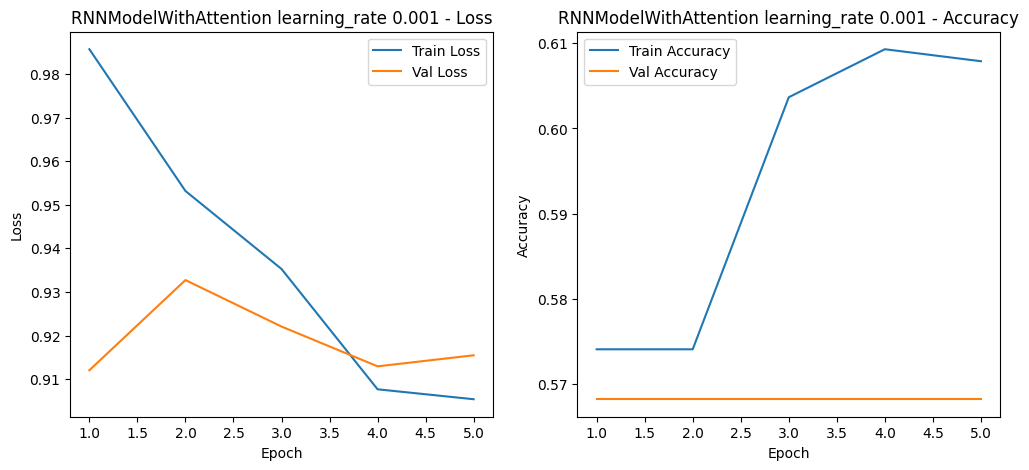

train_loss: [1.0861927789190542, 1.0219581904618635, 0.9529708209245101, 0.9197117582611416, 0.9036912425704624]
val_loss: [1.0512619813283284, 0.9717253049214681, 0.9112538496653239, 0.9093034863471985, 0.92002934217453]
train_acc: [0.33709449929478136, 0.5881523272214386, 0.6050775740479548, 0.5980253878702397, 0.5895627644569816]
val_acc: [0.5681818181818182, 0.5909090909090909, 0.5909090909090909, 0.6136363636363636, 0.5909090909090909]


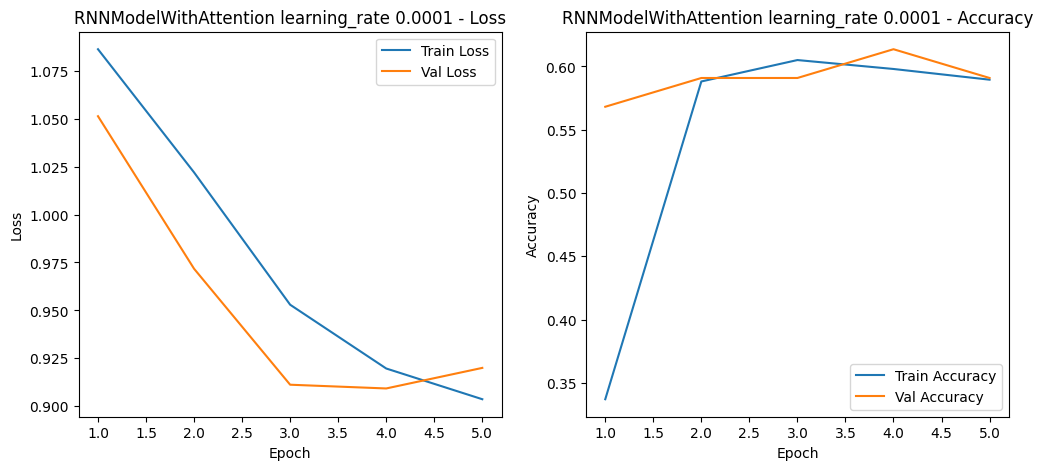

train_loss: [0.9760599110437476, 0.9145694582358651, 0.8964031675587529, 0.8982243900713713, 0.8848808200463004]
val_loss: [0.9348851641019186, 0.924746016661326, 0.9210079312324524, 0.9148887197176615, 0.9250086347262064]
train_acc: [0.5557122708039492, 0.5909732016925247, 0.6036671368124118, 0.5980253878702397, 0.6008462623413258]
val_acc: [0.6022727272727273, 0.6022727272727273, 0.5909090909090909, 0.6136363636363636, 0.5909090909090909]


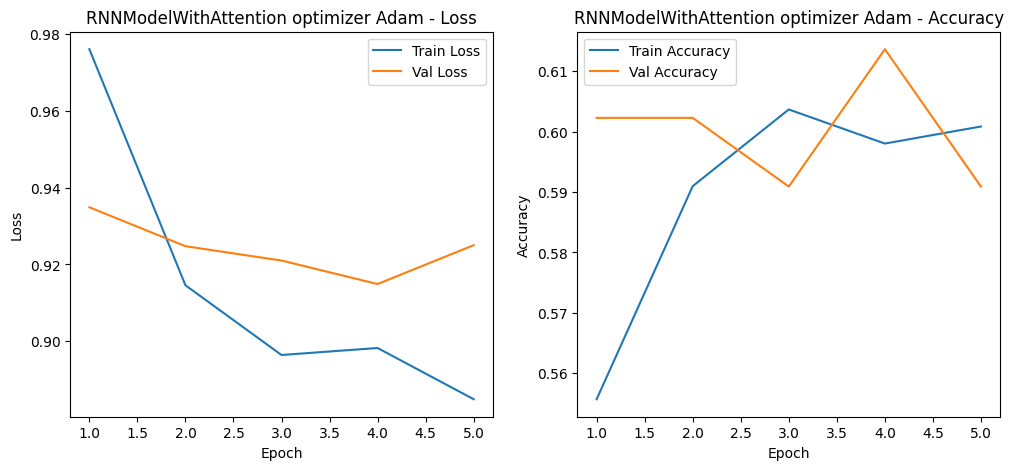

train_loss: [1.0885753009630286, 1.0859242885009102, 1.0866903792256895, 1.086379103038622, 1.086618905482085]
val_loss: [1.0841229756673176, 1.0831518570582073, 1.08228866259257, 1.0814534028371174, 1.0806934436162312]
train_acc: [0.41607898448519043, 0.41607898448519043, 0.41607898448519043, 0.41607898448519043, 0.41607898448519043]
val_acc: [0.4772727272727273, 0.4772727272727273, 0.4772727272727273, 0.4772727272727273, 0.4772727272727273]


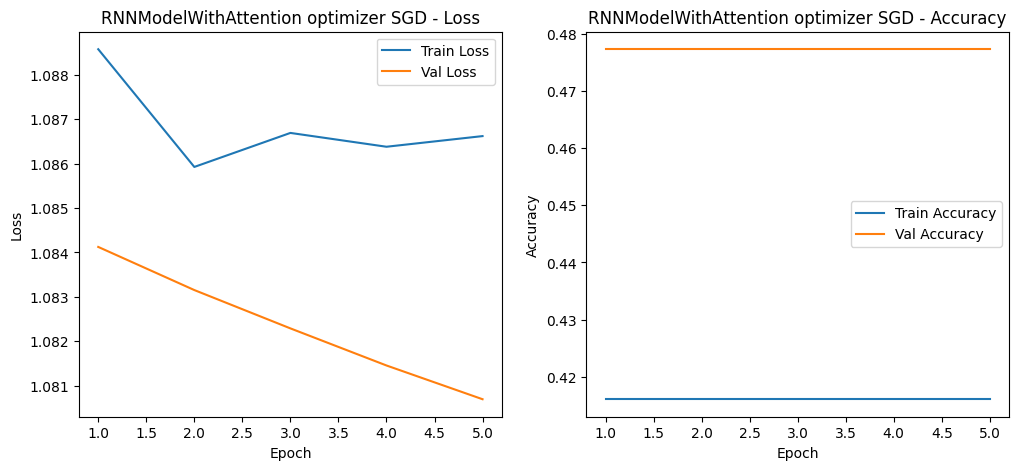

train_loss: [0.9867510095886562, 0.9272484286971714, 0.9567990717680558, 0.9410352940144746, 0.8997312421384065]
val_loss: [0.914542039235433, 0.8898259997367859, 0.8955996235211691, 0.893825888633728, 0.8703845938046774]
train_acc: [0.5444287729196051, 0.5895627644569816, 0.5684062059238364, 0.5895627644569816, 0.5895627644569816]
val_acc: [0.6477272727272727, 0.6477272727272727, 0.6477272727272727, 0.6477272727272727, 0.6477272727272727]


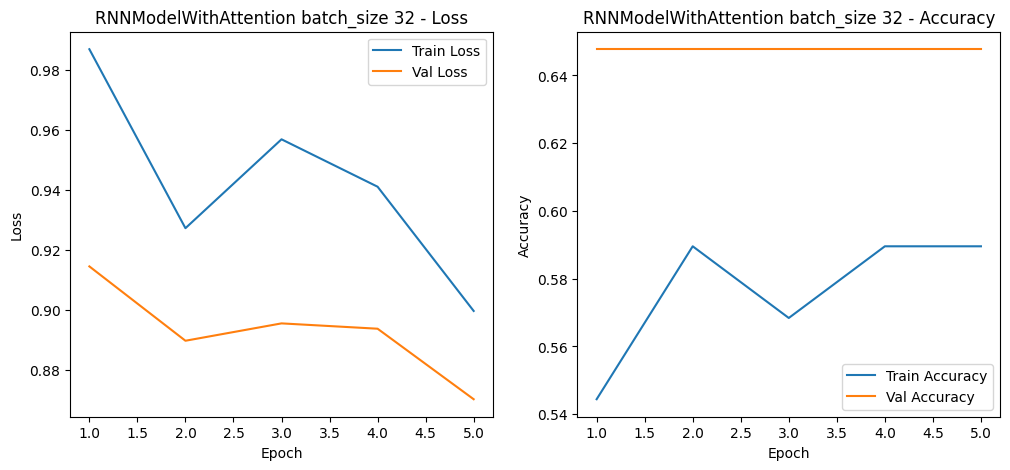

train_loss: [0.9660586714744568, 0.9258768111467361, 0.9192629605531693, 0.917428990205129, 0.8898620853821436]
val_loss: [0.9092943072319031, 0.8850715756416321, 0.8916306793689728, 0.9117207825183868, 0.9121620655059814]
train_acc: [0.5444287729196051, 0.5966149506346967, 0.5923836389280677, 0.6050775740479548, 0.6036671368124118]
val_acc: [0.5340909090909091, 0.5681818181818182, 0.5909090909090909, 0.5681818181818182, 0.5681818181818182]


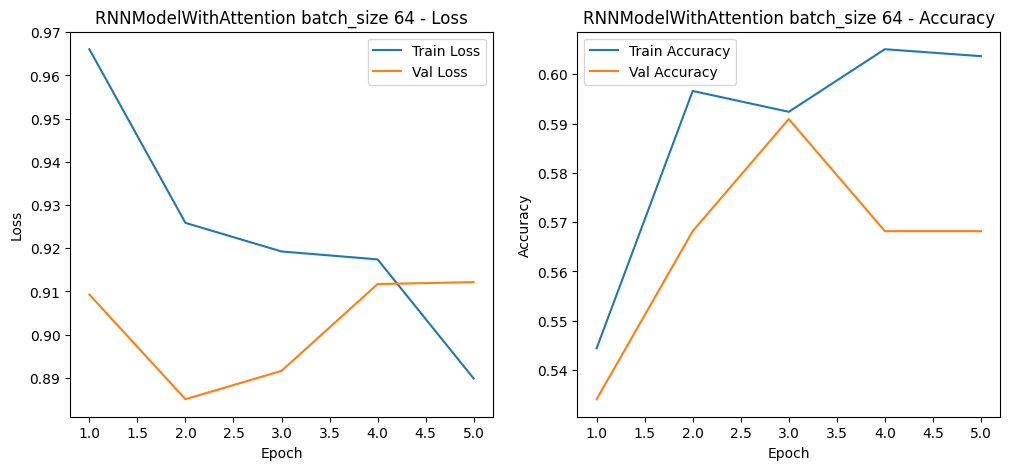

train_loss: [0.9932844509249148, 0.9269052510676177, 0.9152416509130726, 0.9076618474462758, 0.8993022545524265]
val_loss: [1.0162376562754314, 1.005299190680186, 1.0072544018427532, 1.0000767310460408, 1.0065365831057231]
train_acc: [0.5655853314527504, 0.5909732016925247, 0.5980253878702397, 0.5994358251057827, 0.5980253878702397]
val_acc: [0.5227272727272727, 0.5227272727272727, 0.5340909090909091, 0.5227272727272727, 0.5227272727272727]


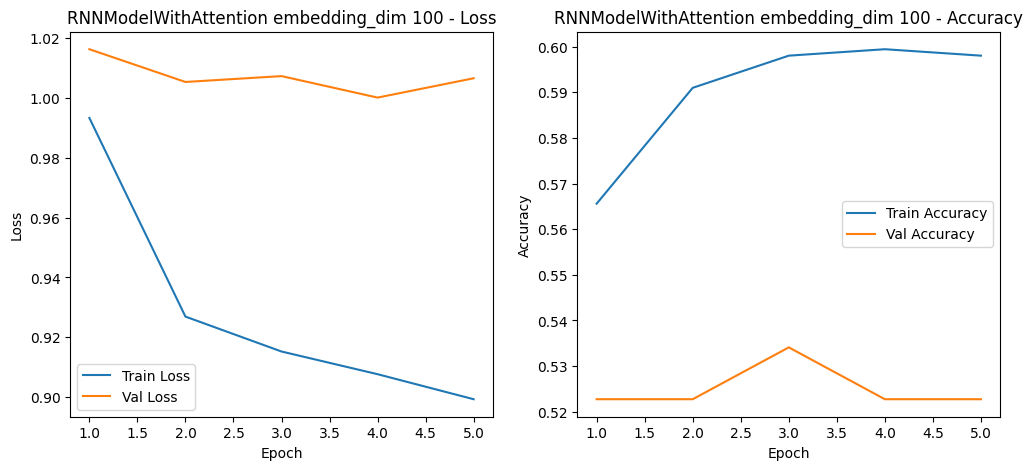

train_loss: [0.9530192380366118, 0.9285471646682076, 0.908429187277089, 0.8721586323302725, 0.8115932682286138]
val_loss: [0.8746603528658549, 0.8406101663907369, 0.8328459660212199, 0.8182769020398458, 0.8214713533719381]
train_acc: [0.5543018335684062, 0.5909732016925247, 0.6008462623413258, 0.613540197461213, 0.6558533145275035]
val_acc: [0.625, 0.625, 0.6363636363636364, 0.6590909090909091, 0.6477272727272727]


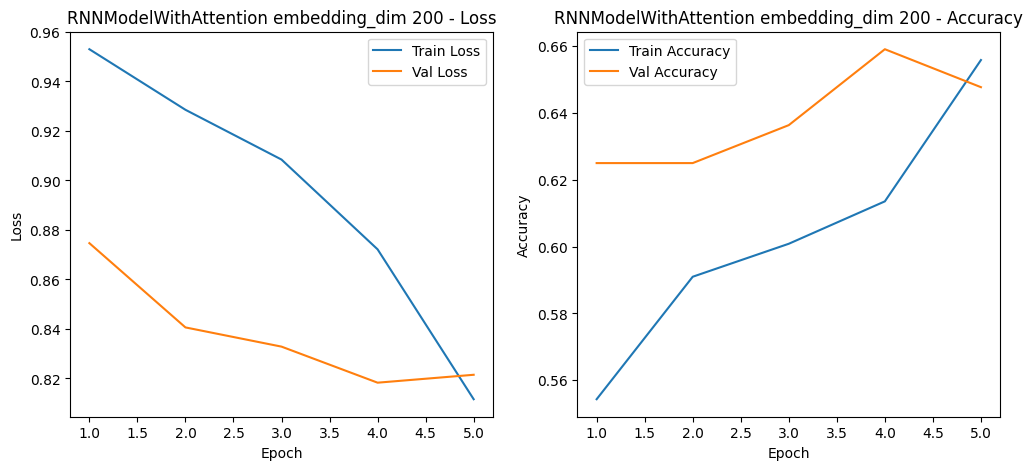

train_loss: [0.9778513830641041, 0.9158598806547082, 0.8980716622394064, 0.9000091215838557, 0.9079738000164861]
val_loss: [0.9538049896558126, 0.9569531480471293, 0.9622501532236735, 0.9634040395418803, 0.9580790996551514]
train_acc: [0.5514809590973202, 0.616361071932299, 0.616361071932299, 0.6177715091678421, 0.616361071932299]
val_acc: [0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454]


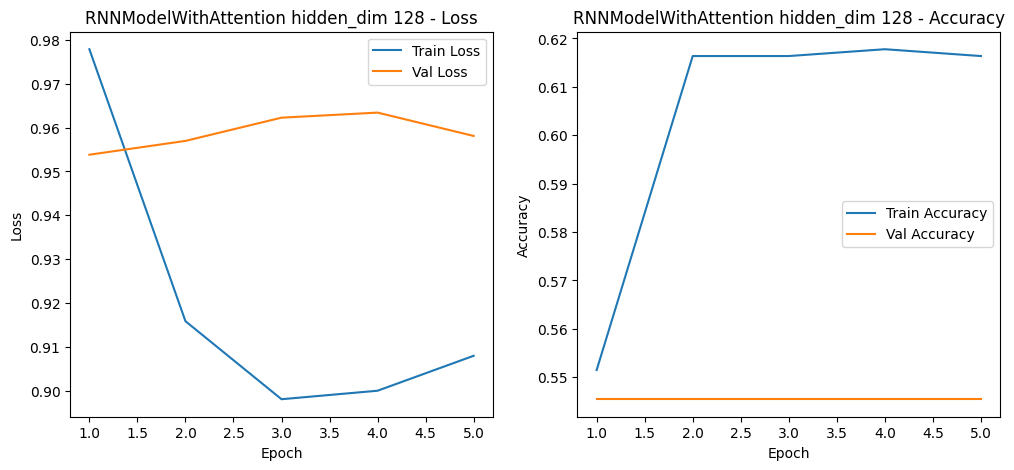

train_loss: [0.9930304807165394, 0.9467214786488077, 0.9265876412391663, 0.928722866203474, 0.8858551149782927]
val_loss: [0.8640499114990234, 0.8468351562817892, 0.8262608448664347, 0.7870461344718933, 0.8986664811770121]
train_acc: [0.5543018335684062, 0.5853314527503526, 0.5867418899858956, 0.5881523272214386, 0.6205923836389281]
val_acc: [0.6931818181818182, 0.6704545454545454, 0.6704545454545454, 0.6931818181818182, 0.6477272727272727]


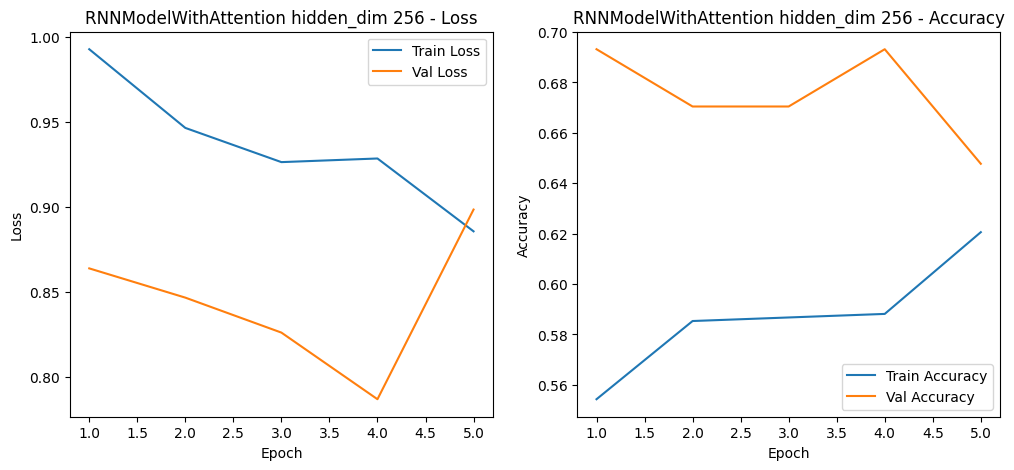

train_loss: [0.9787567517031794, 0.9260863506275675, 0.9193732427514117, 0.9067691486814747, 0.909893300222314]
val_loss: [0.9492964943250021, 0.9506990710894266, 0.9435847004254659, 0.9606830875078837, 0.955628514289856]
train_acc: [0.5528913963328632, 0.5740479548660085, 0.5825105782792666, 0.5881523272214386, 0.5853314527503526]
val_acc: [0.5681818181818182, 0.5340909090909091, 0.5795454545454546, 0.5340909090909091, 0.5340909090909091]


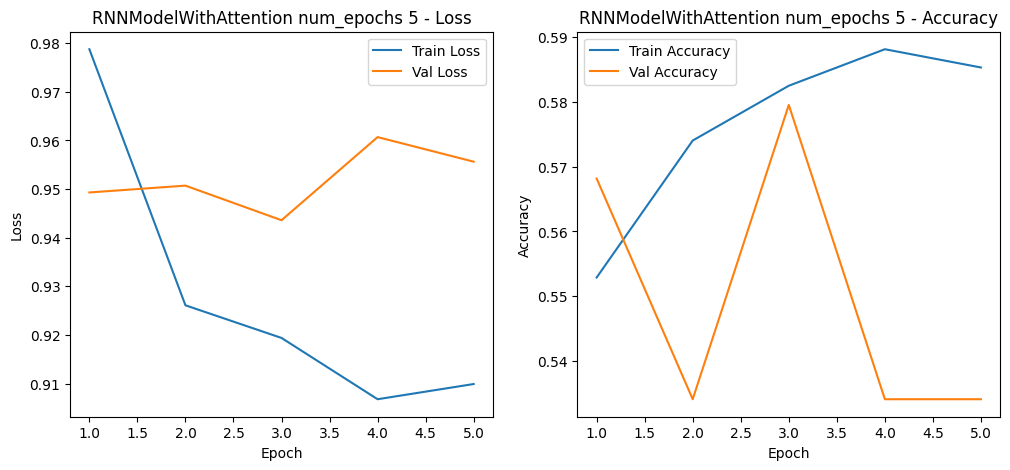

train_loss: [0.9794925554938938, 0.9172865592915079, 0.9191040448520494, 0.8947308426317961, 0.870465460030929, 0.8517977362093718, 0.8290362358093262, 0.778694722963416, 0.6822857480982075, 0.6324651578198308]
val_loss: [0.8656334280967712, 0.8314037322998047, 0.8163049022356669, 0.8426936070124308, 0.7866880695025126, 0.8074941039085388, 0.8197716474533081, 0.9285592238108317, 0.8505293130874634, 0.9467165867487589]
train_acc: [0.5585331452750353, 0.5853314527503526, 0.5994358251057827, 0.5980253878702397, 0.610719322990127, 0.6191819464033851, 0.6346967559943583, 0.6812411847672779, 0.7207334273624824, 0.7433004231311706]
val_acc: [0.6363636363636364, 0.6704545454545454, 0.6931818181818182, 0.6818181818181818, 0.6931818181818182, 0.6931818181818182, 0.6704545454545454, 0.6136363636363636, 0.6136363636363636, 0.5795454545454546]


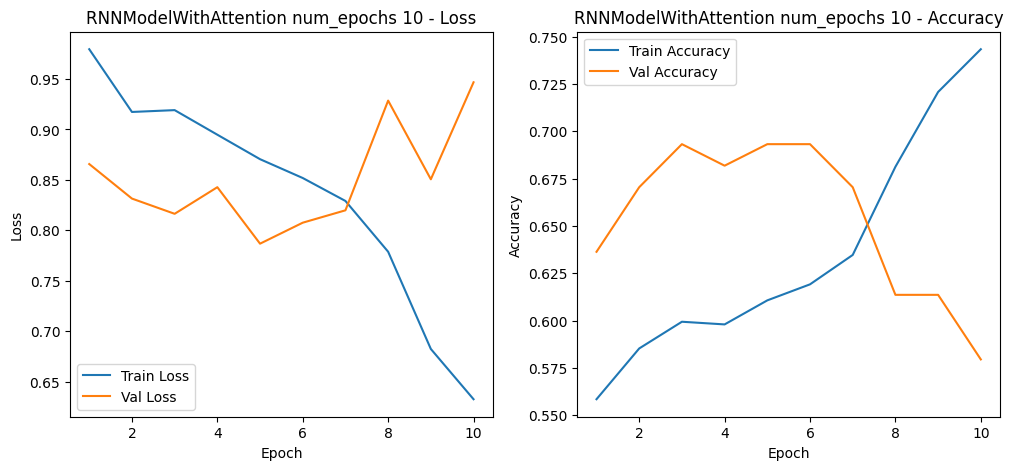

train_loss: [0.9705088449561078, 0.9146653543347898, 0.93343237431153, 0.9086826599162557, 0.8974431001621744]
val_loss: [0.9072829683621725, 0.9356622695922852, 0.918111264705658, 0.9196689327557882, 0.9153233766555786]
train_acc: [0.5500705218617772, 0.5980253878702397, 0.5980253878702397, 0.5994358251057827, 0.5980253878702397]
val_acc: [0.6136363636363636, 0.5909090909090909, 0.5909090909090909, 0.6022727272727273, 0.6136363636363636]


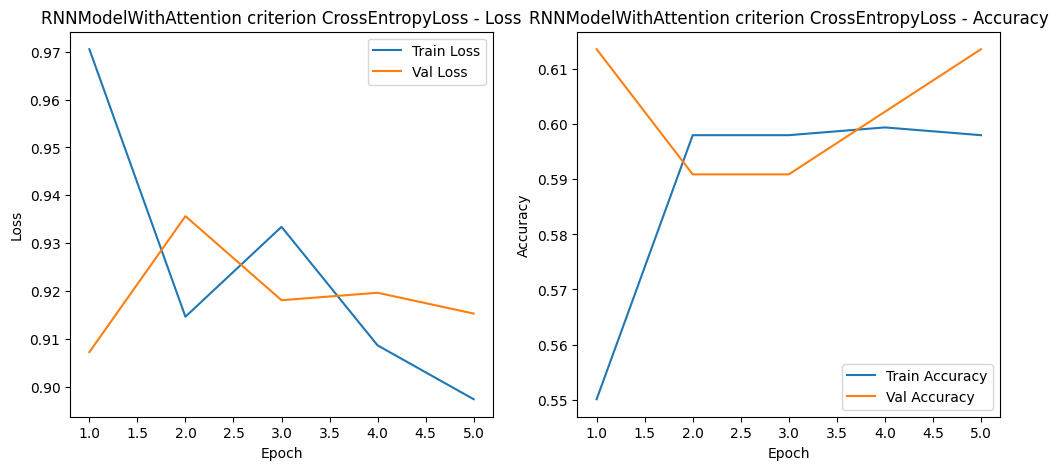

train_loss: [0.9604421776273976, 0.9135632281718047, 0.9051510173341503, 0.8903565277224001, 0.8932491748229318]
val_loss: [1.1233233014742534, 1.050921340783437, 1.0227606097857158, 1.064660330613454, 1.0470558404922485]
train_acc: [0.5500705218617772, 0.5994358251057827, 0.6036671368124118, 0.6036671368124118, 0.6036671368124118]
val_acc: [0.5113636363636364, 0.5227272727272727, 0.5227272727272727, 0.5227272727272727, 0.5227272727272727]


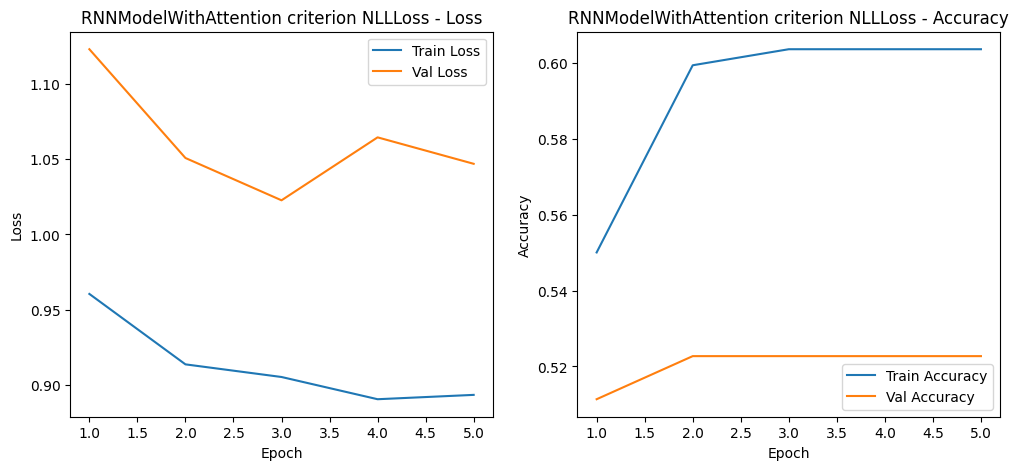

train_loss: [1.0003903378611025, 0.9479559063911438, 0.9069891857064288, 0.8978230175764664, 0.8870853807615198]
val_loss: [0.8527448376019796, 0.8402305841445923, 0.8280463218688965, 0.829069177309672, 0.8324976762135824]
train_acc: [0.5613540197461213, 0.5909732016925247, 0.6205923836389281, 0.6205923836389281, 0.614950634696756]
val_acc: [0.6704545454545454, 0.6931818181818182, 0.6931818181818182, 0.6931818181818182, 0.6931818181818182]


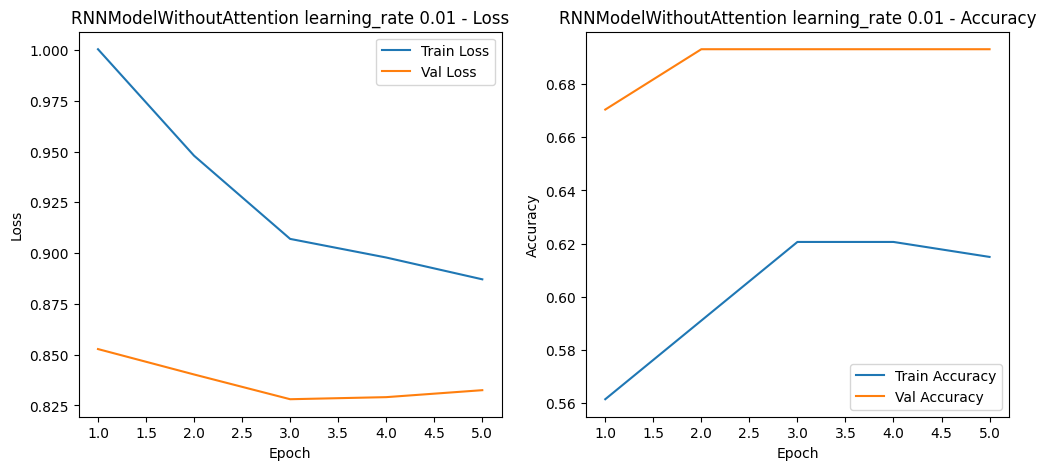

train_loss: [0.9953909334929093, 0.9606923253639884, 0.9612825849781865, 0.9318212218906569, 0.9471008570297904]
val_loss: [0.8993142048517863, 0.8851985136667887, 0.9464755455652872, 0.900353729724884, 0.9174192349116007]
train_acc: [0.5232722143864598, 0.538787023977433, 0.538787023977433, 0.5669957686882934, 0.5712270803949224]
val_acc: [0.6136363636363636, 0.6363636363636364, 0.4772727272727273, 0.6363636363636364, 0.6363636363636364]


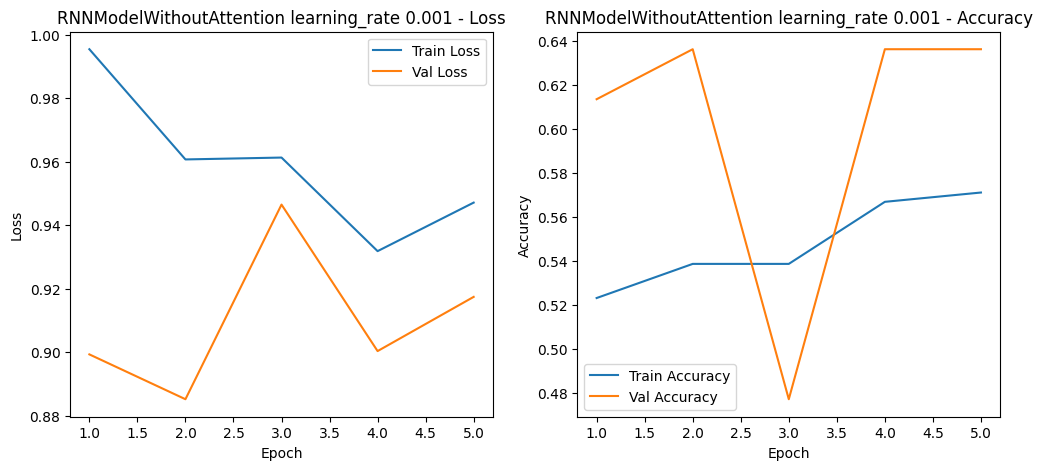

train_loss: [1.0661665641743203, 1.0136537500049756, 0.9607330482939015, 0.9508070038712543, 0.9465063240217126]
val_loss: [1.0416187445322673, 0.9738632837931315, 0.9552642703056335, 0.9465476870536804, 0.9483792980511984]
train_acc: [0.4809590973201692, 0.5627644569816643, 0.5811001410437235, 0.5853314527503526, 0.5825105782792666]
val_acc: [0.5227272727272727, 0.5340909090909091, 0.5227272727272727, 0.5227272727272727, 0.5340909090909091]


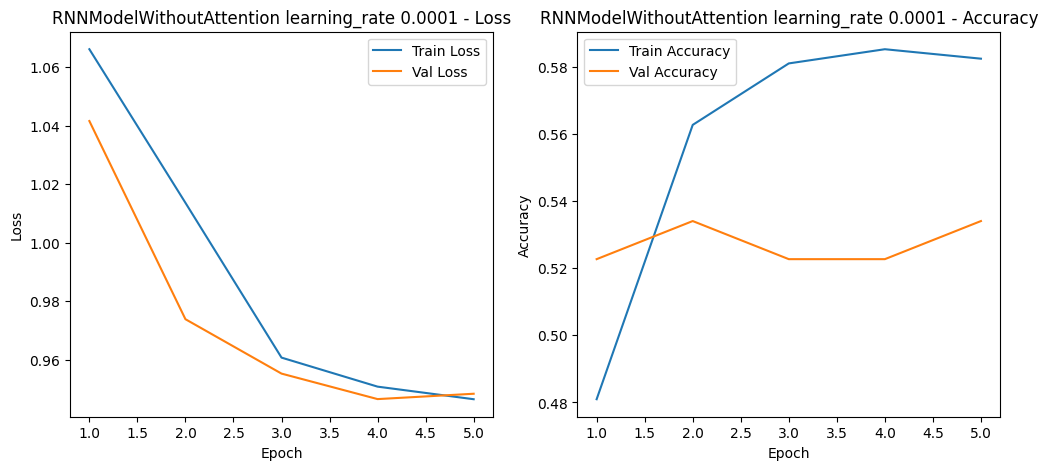

train_loss: [0.9840549411981002, 0.9518819192181462, 0.9272208913512852, 0.9230288474456124, 0.9198355933894282]
val_loss: [0.9791366457939148, 0.977591335773468, 0.9771961172421774, 0.9834168752034506, 0.9828296899795532]
train_acc: [0.5669957686882934, 0.6008462623413258, 0.5952045133991537, 0.5980253878702397, 0.6008462623413258]
val_acc: [0.5568181818181818, 0.5568181818181818, 0.5568181818181818, 0.5568181818181818, 0.5568181818181818]


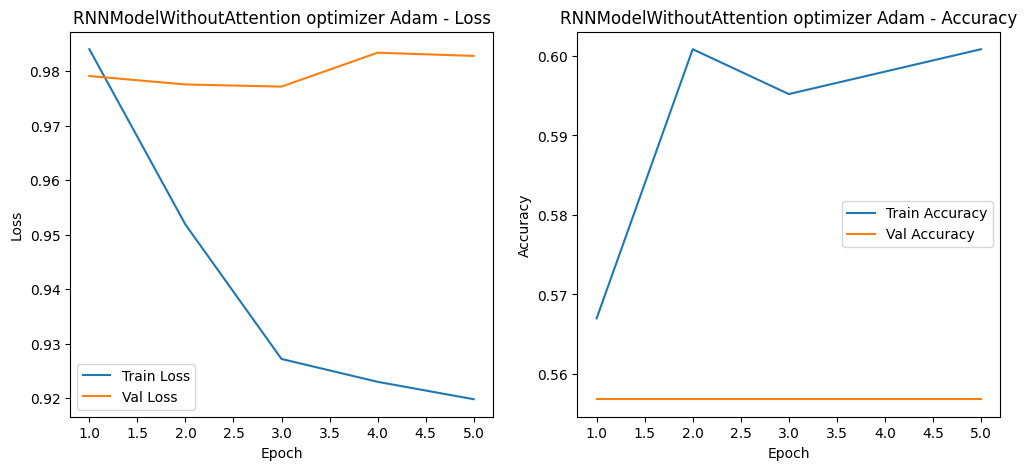

train_loss: [1.0953004308368848, 1.0942215090212615, 1.091232999511387, 1.090812112974084, 1.088752549627553]
val_loss: [1.0941620667775471, 1.0925273497899373, 1.0908077557881672, 1.0890918970108032, 1.0874282121658325]
train_acc: [0.42595204513399154, 0.41889985895627646, 0.4301833568406206, 0.4527503526093089, 0.44569816643159377]
val_acc: [0.4659090909090909, 0.4659090909090909, 0.5, 0.5, 0.4772727272727273]


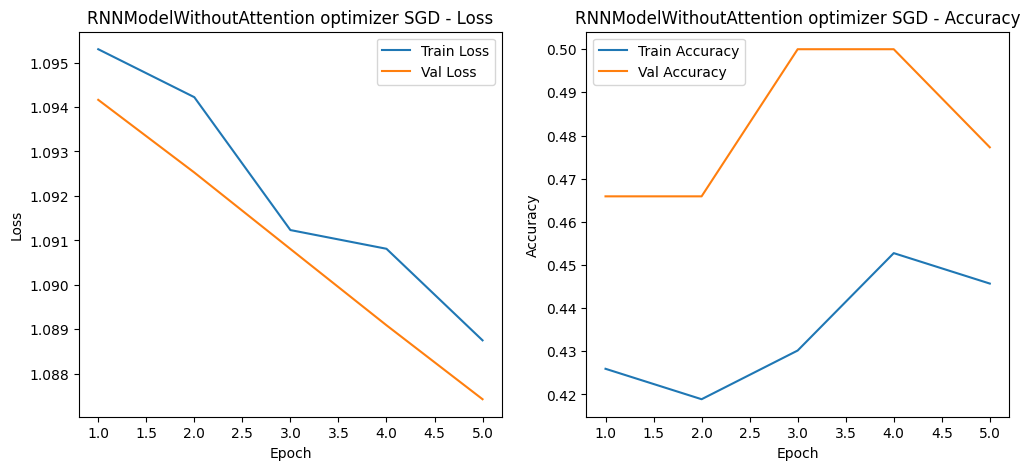

train_loss: [0.9811421917832416, 0.9161023419836293, 0.9361595641011777, 0.9231054523716802, 0.928276178629502]
val_loss: [0.8621246616045634, 0.8609928290049235, 0.865861694018046, 0.8634292483329773, 0.8526689012845358]
train_acc: [0.5528913963328632, 0.5895627644569816, 0.5895627644569816, 0.5895627644569816, 0.5754583921015515]
val_acc: [0.6363636363636364, 0.6363636363636364, 0.6363636363636364, 0.6363636363636364, 0.6363636363636364]


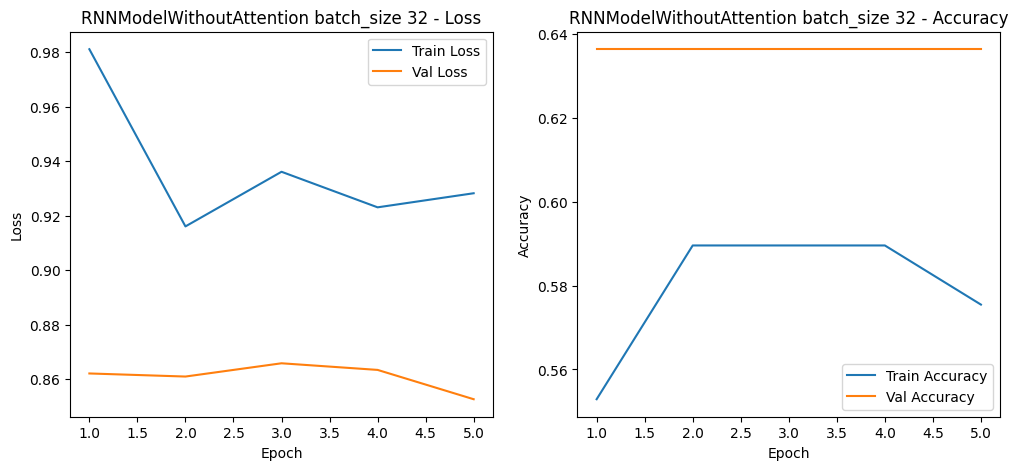

train_loss: [0.9991829097270966, 0.9489050507545471, 0.9520912418762842, 0.9544523855050405, 0.9239833603302637]
val_loss: [0.8705599904060364, 0.9098230600357056, 0.9179184138774872, 0.8955629467964172, 0.9083313345909119]
train_acc: [0.538787023977433, 0.5740479548660085, 0.5698166431593794, 0.5796897038081805, 0.5782792665726375]
val_acc: [0.5909090909090909, 0.5909090909090909, 0.5909090909090909, 0.5909090909090909, 0.5909090909090909]


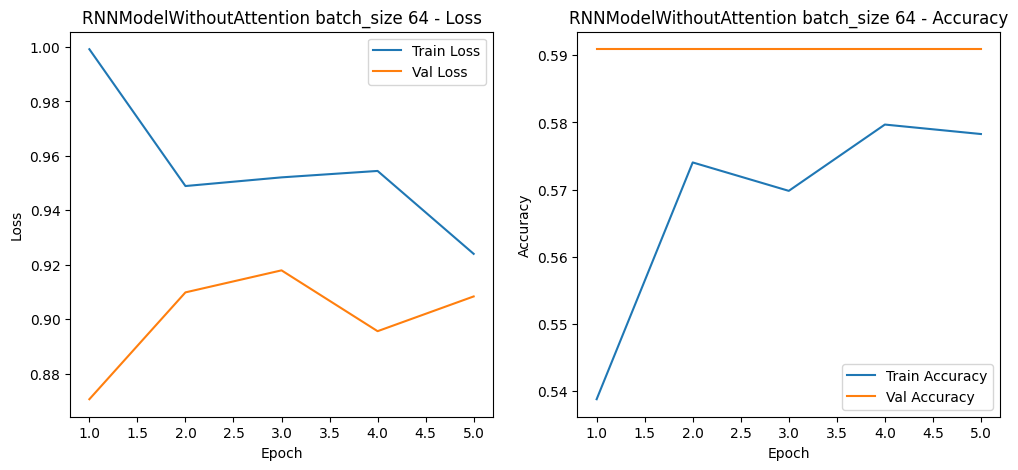

train_loss: [0.9611204136972842, 0.9252336724944736, 0.908624750116597, 0.9175979702369027, 0.9100219944249028]
val_loss: [0.9475961526234945, 0.93473881483078, 0.9386165936787924, 0.9408471981684366, 0.9254839022954305]
train_acc: [0.5669957686882934, 0.6022566995768688, 0.5966149506346967, 0.6050775740479548, 0.6050775740479548]
val_acc: [0.5227272727272727, 0.5340909090909091, 0.5568181818181818, 0.5568181818181818, 0.5568181818181818]


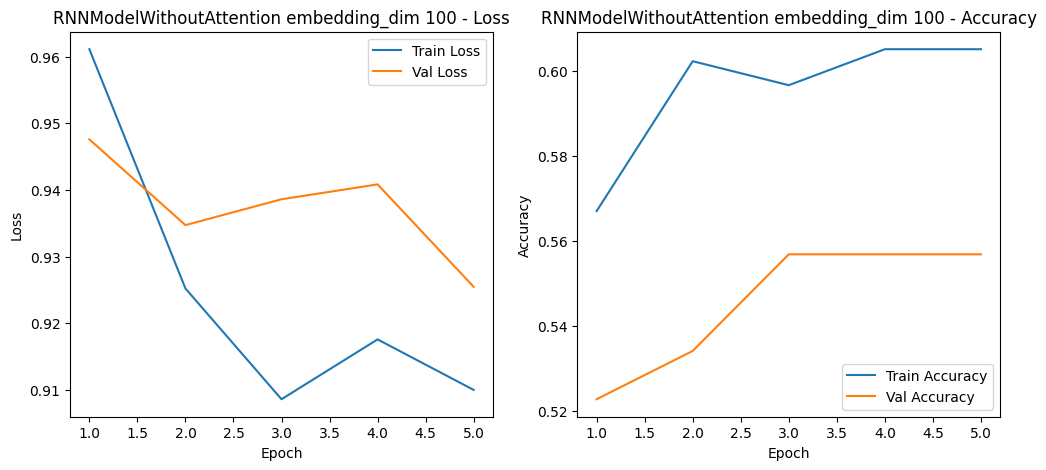

train_loss: [0.9913242511127306, 0.9446182380551877, 0.9578225742215696, 0.9557995070581851, 0.957332546296327]
val_loss: [0.8885440429051717, 0.8735417127609253, 0.8798452019691467, 0.874011754989624, 0.9014454483985901]
train_acc: [0.5514809590973202, 0.5782792665726375, 0.5782792665726375, 0.5782792665726375, 0.5782792665726375]
val_acc: [0.6477272727272727, 0.6477272727272727, 0.6477272727272727, 0.6477272727272727, 0.6477272727272727]


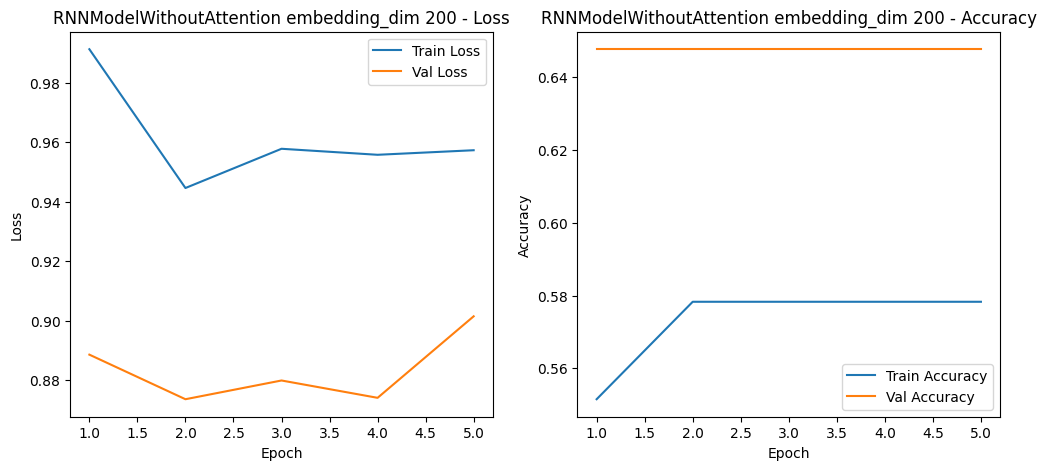

train_loss: [0.9654438443805861, 0.9068427500517472, 0.8970682854237764, 0.8827881916709568, 0.8995969425077024]
val_loss: [0.915840725104014, 0.9119895497957865, 0.900503396987915, 0.8992066184679667, 0.9109087586402893]
train_acc: [0.6022566995768688, 0.61212976022567, 0.616361071932299, 0.613540197461213, 0.616361071932299]
val_acc: [0.5568181818181818, 0.5681818181818182, 0.5681818181818182, 0.6022727272727273, 0.5681818181818182]


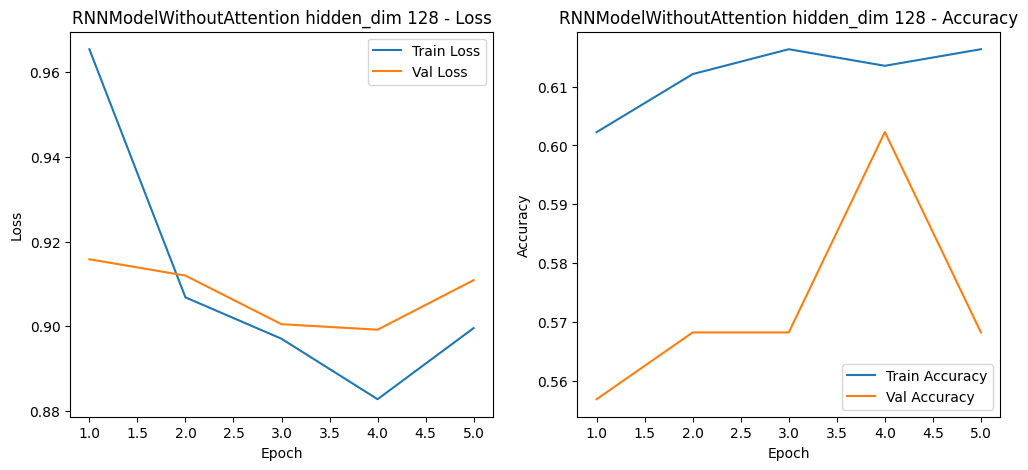

train_loss: [0.9919500532357589, 0.9572274918141572, 0.9334825160710708, 0.9509681955627773, 0.9328539889791737]
val_loss: [1.0055603583653767, 1.0019842783610027, 1.0499818921089172, 1.0163846810658772, 1.0421954194704692]
train_acc: [0.5303244005641748, 0.5782792665726375, 0.5613540197461213, 0.5796897038081805, 0.5796897038081805]
val_acc: [0.5227272727272727, 0.5227272727272727, 0.5227272727272727, 0.5227272727272727, 0.5227272727272727]


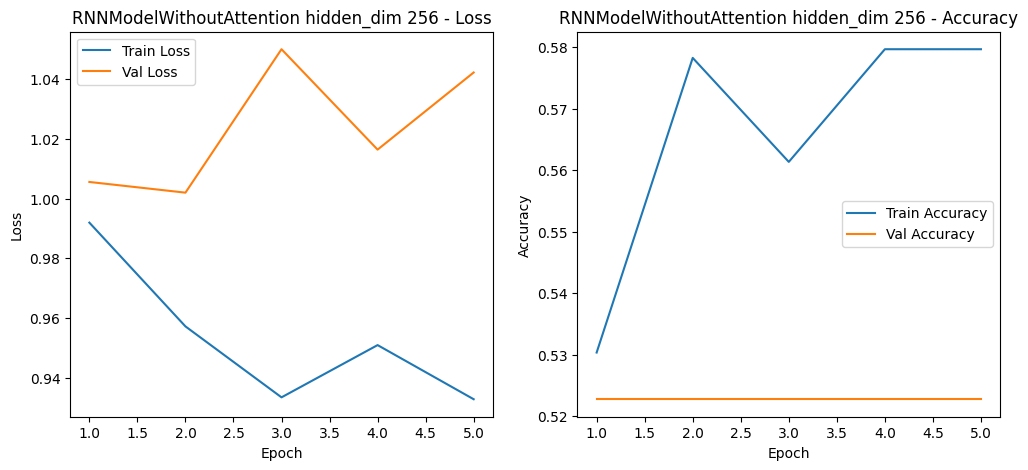

train_loss: [0.9776012301445007, 0.9239099155301633, 0.9175484776496887, 0.9010134520738021, 0.9162282425424327]
val_loss: [0.9190409183502197, 0.8704272111256918, 0.8775564630826315, 0.8646535476048788, 0.8669508099555969]
train_acc: [0.5740479548660085, 0.5867418899858956, 0.609308885754584, 0.609308885754584, 0.609308885754584]
val_acc: [0.6363636363636364, 0.625, 0.625, 0.625, 0.625]


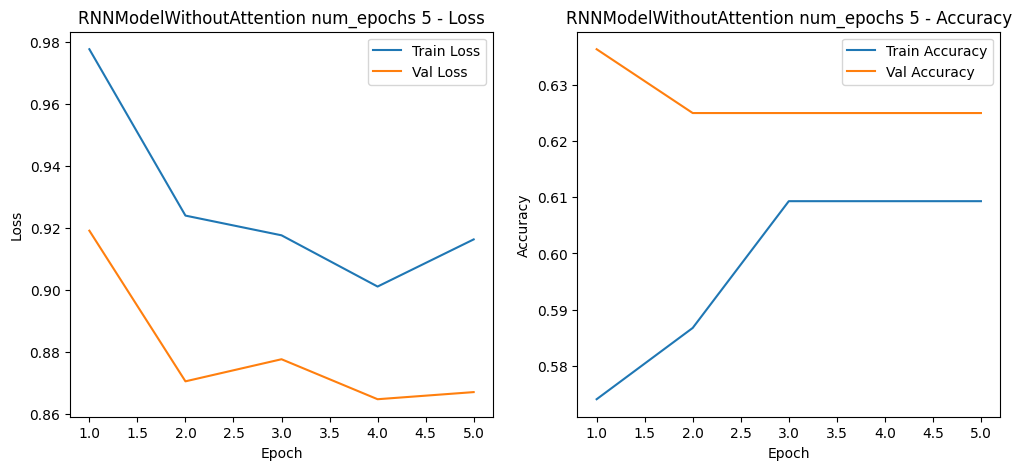

train_loss: [0.9982821189838907, 0.9395710877750231, 0.9518915984941565, 0.946829837301503, 0.9477430815282075, 0.9367136177809342, 0.9604139924049377, 0.9323765842810922, 0.9341206783833711, 0.9343622896982275]
val_loss: [0.9561815857887268, 0.9035336971282959, 0.9119001428286234, 0.9021987716356913, 0.8988807598749796, 0.9119651913642883, 0.8956347306569418, 0.8945462703704834, 0.8926807840665182, 0.8975681861241659]
train_acc: [0.5345557122708039, 0.5740479548660085, 0.5740479548660085, 0.5754583921015515, 0.5754583921015515, 0.5754583921015515, 0.5754583921015515, 0.5754583921015515, 0.5754583921015515, 0.5754583921015515]
val_acc: [0.6136363636363636, 0.6477272727272727, 0.6136363636363636, 0.6136363636363636, 0.6136363636363636, 0.6136363636363636, 0.6136363636363636, 0.6136363636363636, 0.6136363636363636, 0.6136363636363636]


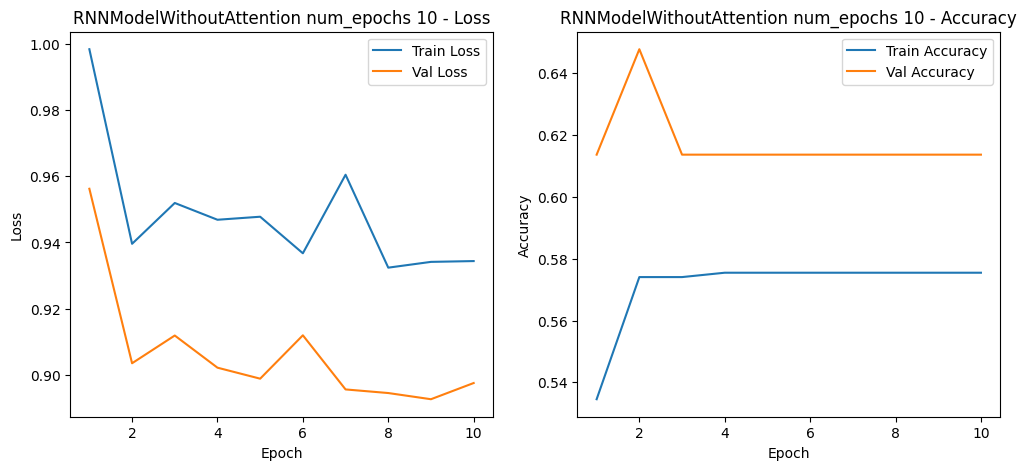

train_loss: [0.9744401263154071, 0.9096499525982401, 0.9056961873303289, 0.8894292116165161, 0.8863606064215951]
val_loss: [0.9398907820383707, 0.8613997101783752, 0.8946605324745178, 0.8889061212539673, 0.8767025073369344]
train_acc: [0.5444287729196051, 0.6050775740479548, 0.6036671368124118, 0.6050775740479548, 0.607898448519041]
val_acc: [0.4090909090909091, 0.6818181818181818, 0.6477272727272727, 0.6818181818181818, 0.6477272727272727]


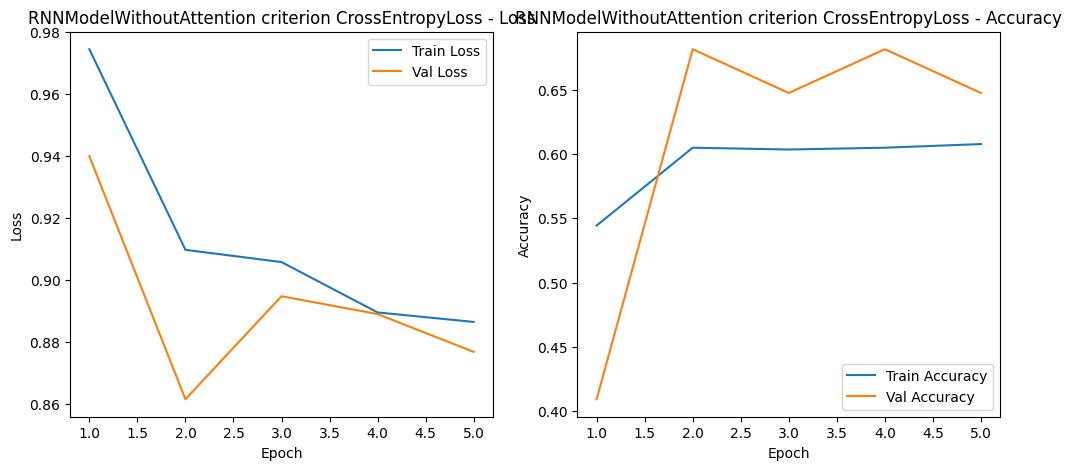

train_loss: [0.946817828261334, 0.9166372599809066, 0.8942438856415127, 0.9238923917645994, 0.9093390703201294]
val_loss: [0.8603436946868896, 0.8500723242759705, 0.8534812529881796, 0.8437881469726562, 0.8411784172058105]
train_acc: [0.5909732016925247, 0.6234132581100141, 0.6191819464033851, 0.6234132581100141, 0.6234132581100141]
val_acc: [0.6704545454545454, 0.6704545454545454, 0.6477272727272727, 0.6704545454545454, 0.6704545454545454]


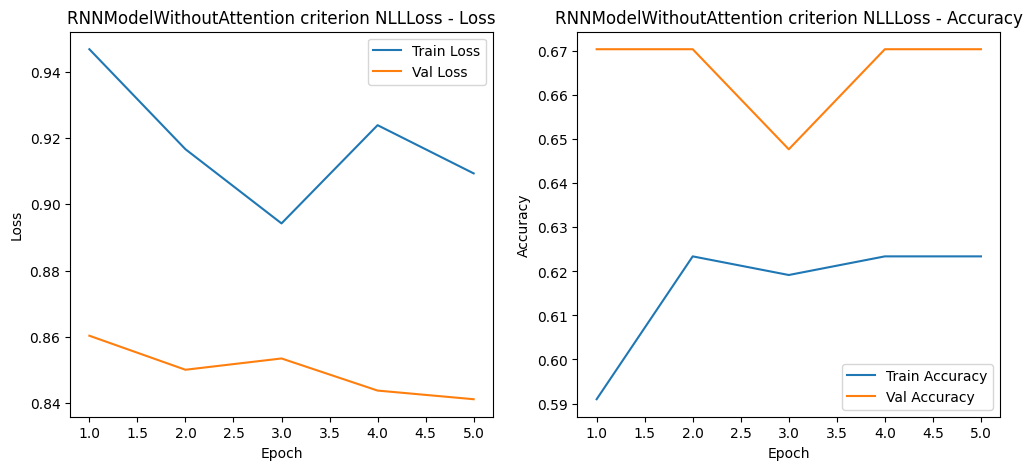

train_loss: [1.0032740805460059, 0.9504384242970011, 0.953037484832432, 0.9448853031448696, 0.9431587664977364]
val_loss: [0.8868507146835327, 0.8572001854578654, 0.9316855867703756, 0.8924147685368856, 0.8648803432782491]
train_acc: [0.5289139633286318, 0.5585331452750353, 0.5444287729196051, 0.5712270803949224, 0.5698166431593794]
val_acc: [0.6022727272727273, 0.6477272727272727, 0.6022727272727273, 0.625, 0.625]


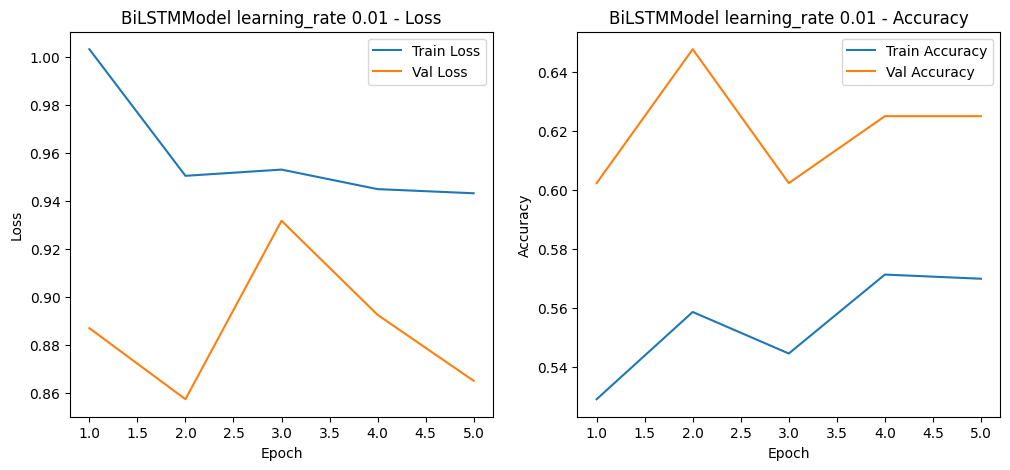

train_loss: [0.992845690768698, 0.9434607521347378, 0.9276039729947629, 0.9291388470193614, 0.9202798527220021]
val_loss: [0.8927143017450968, 0.9336877465248108, 0.9113797346750895, 0.9078312516212463, 0.9304637908935547]
train_acc: [0.5232722143864598, 0.5796897038081805, 0.5853314527503526, 0.5853314527503526, 0.5754583921015515]
val_acc: [0.6363636363636364, 0.6022727272727273, 0.6022727272727273, 0.6022727272727273, 0.6022727272727273]


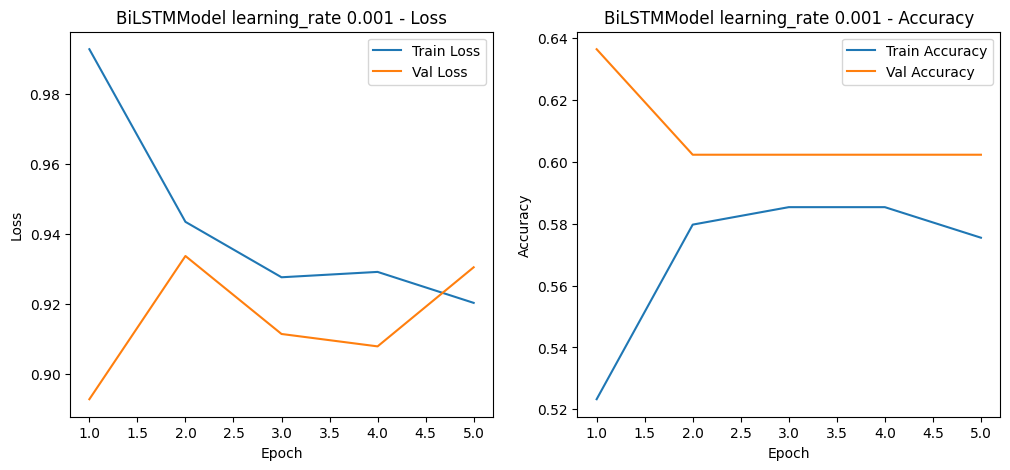

train_loss: [1.06151647153108, 0.9879399745360665, 0.9562513983767965, 0.9571706782216611, 0.9473837743634763]
val_loss: [1.0042662819226582, 0.9343825578689575, 0.9060767690340678, 0.9098895986874899, 0.9197112719217936]
train_acc: [0.4823695345557123, 0.538787023977433, 0.5613540197461213, 0.5712270803949224, 0.5712270803949224]
val_acc: [0.5227272727272727, 0.5227272727272727, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454]


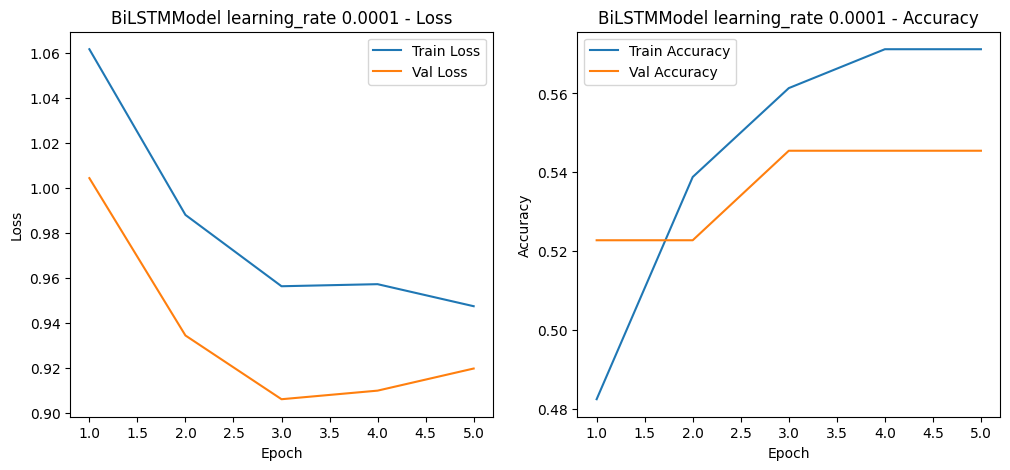

train_loss: [1.0040117294892021, 0.9797383469084034, 0.9430980552797732, 0.9299252473789713, 0.9428210750870083]
val_loss: [0.9178437987963358, 0.8938469688097636, 0.9032137791315714, 0.8991432984670004, 0.9076043963432312]
train_acc: [0.5275035260930888, 0.5331452750352609, 0.5669957686882934, 0.5669957686882934, 0.5669957686882934]
val_acc: [0.6022727272727273, 0.6022727272727273, 0.6022727272727273, 0.6022727272727273, 0.6022727272727273]


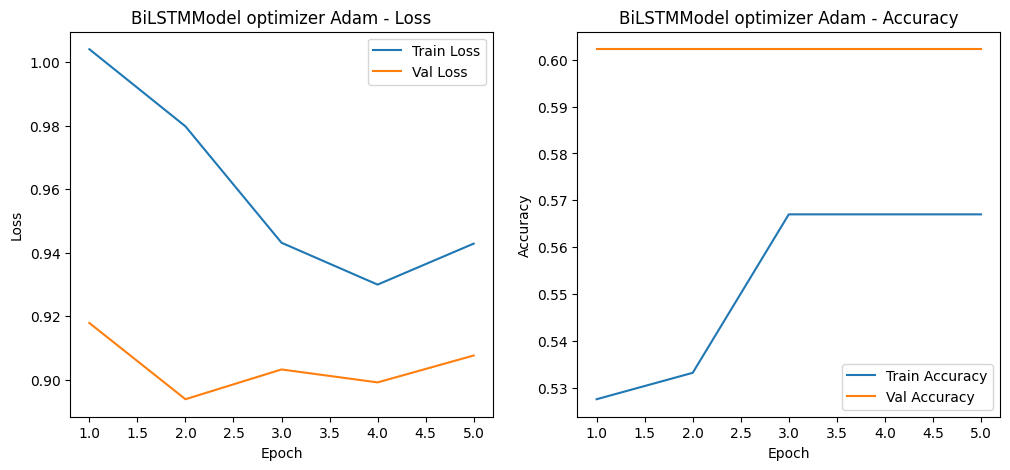

train_loss: [1.1005039992539778, 1.0988544795824133, 1.0973182916641235, 1.0959488775419153, 1.0936006048451299]
val_loss: [1.0933953921000164, 1.0913017590840657, 1.0889923572540283, 1.0867525736490886, 1.0845969120661418]
train_acc: [0.4245416078984485, 0.4245416078984485, 0.4245416078984485, 0.4245416078984485, 0.4400564174894217]
val_acc: [0.5113636363636364, 0.5113636363636364, 0.5113636363636364, 0.5113636363636364, 0.5568181818181818]


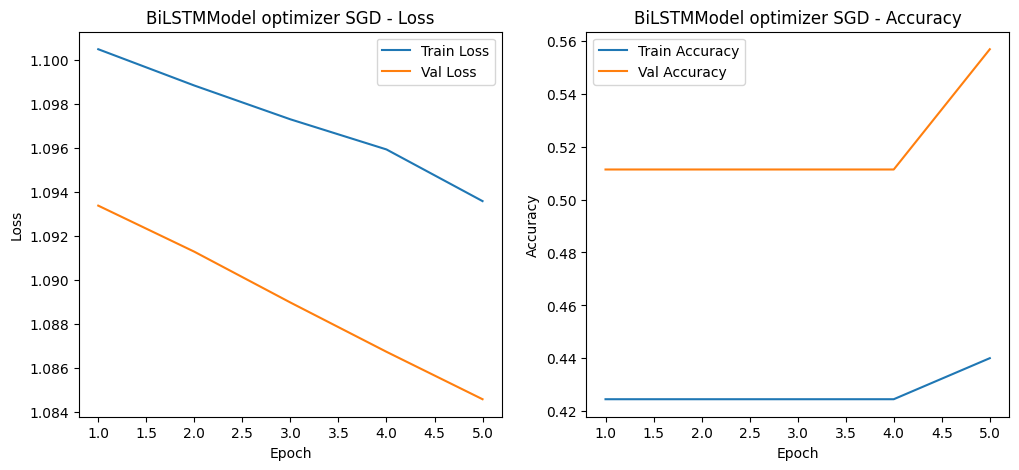

train_loss: [0.9927887605584186, 0.9664444819740627, 0.9542336567588474, 0.9433973068776338, 0.9532772950504137]
val_loss: [1.0986729661623638, 0.9887547691663107, 1.0514132181803386, 1.026609977086385, 1.0347275137901306]
train_acc: [0.4978843441466855, 0.5430183356840621, 0.5444287729196051, 0.5486600846262342, 0.5317348377997179]
val_acc: [0.4772727272727273, 0.5227272727272727, 0.5, 0.5, 0.5]


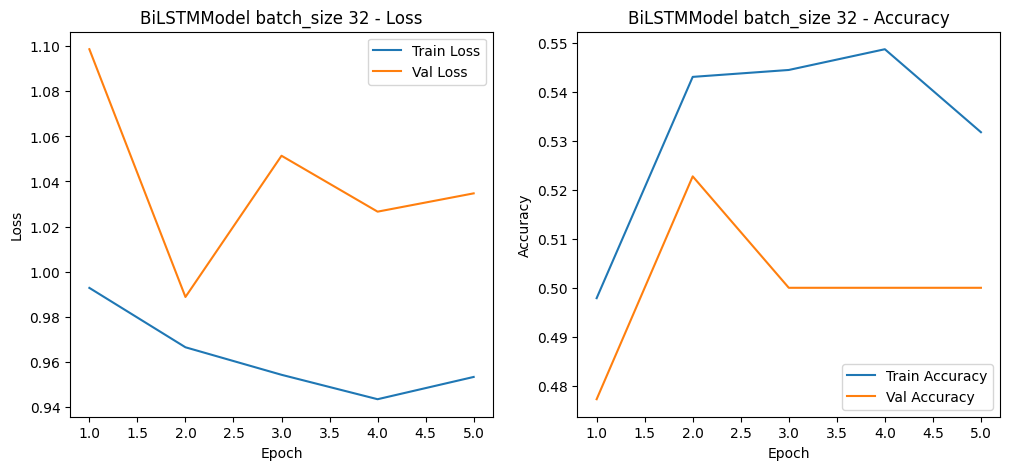

train_loss: [0.9742822547753652, 0.9453878800074259, 0.9309319257736206, 0.9421354929606119, 0.9655797282854716]
val_loss: [0.9008758068084717, 0.920503556728363, 0.9185647964477539, 0.9228402376174927, 0.9236165285110474]
train_acc: [0.5458392101551481, 0.5754583921015515, 0.5768688293370945, 0.5768688293370945, 0.5768688293370945]
val_acc: [0.5681818181818182, 0.5909090909090909, 0.5909090909090909, 0.5909090909090909, 0.5909090909090909]


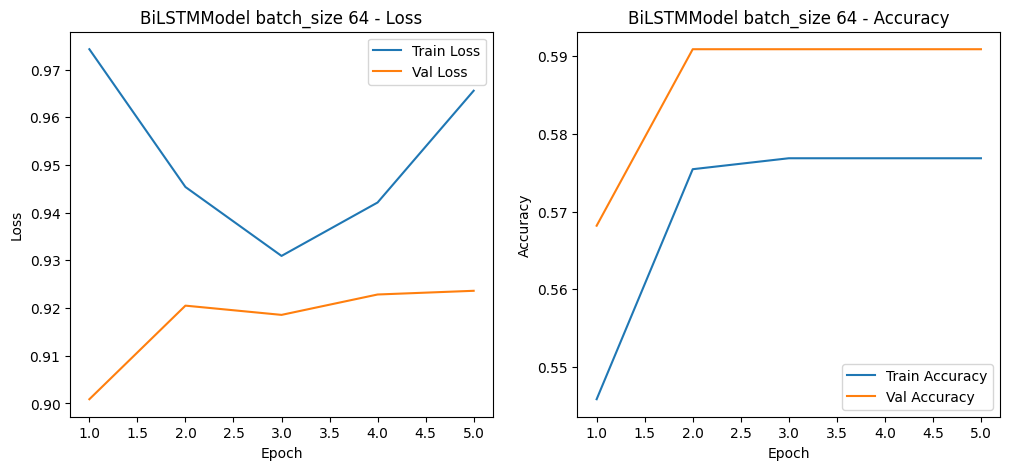

train_loss: [0.977207696956137, 0.9468756188517031, 0.9503375525059907, 0.943726923154748, 0.9381051763244297]
val_loss: [0.9631902575492859, 0.956997831662496, 0.9525125424067179, 0.9785378376642863, 0.9505430658658346]
train_acc: [0.5641748942172073, 0.5669957686882934, 0.5698166431593794, 0.5811001410437235, 0.5768688293370945]
val_acc: [0.5340909090909091, 0.5454545454545454, 0.5568181818181818, 0.5454545454545454, 0.5568181818181818]


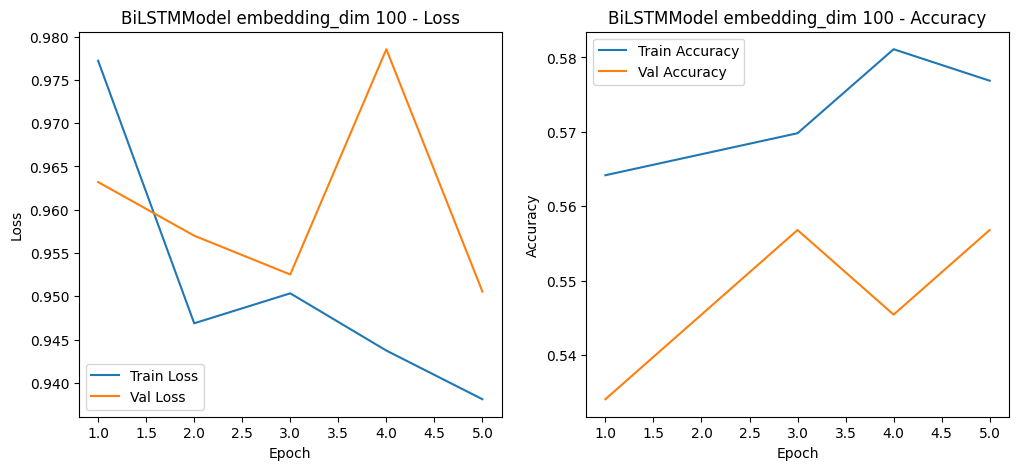

train_loss: [0.9602689872617307, 0.9463906391807224, 0.9408590793609619, 0.950374784676925, 0.9444201044414354]
val_loss: [0.8732579549153646, 0.8937236070632935, 0.8652544418970743, 0.851408044497172, 0.8654537995656332]
train_acc: [0.5486600846262342, 0.5782792665726375, 0.5796897038081805, 0.5867418899858956, 0.5740479548660085]
val_acc: [0.6477272727272727, 0.6477272727272727, 0.6477272727272727, 0.6477272727272727, 0.6477272727272727]


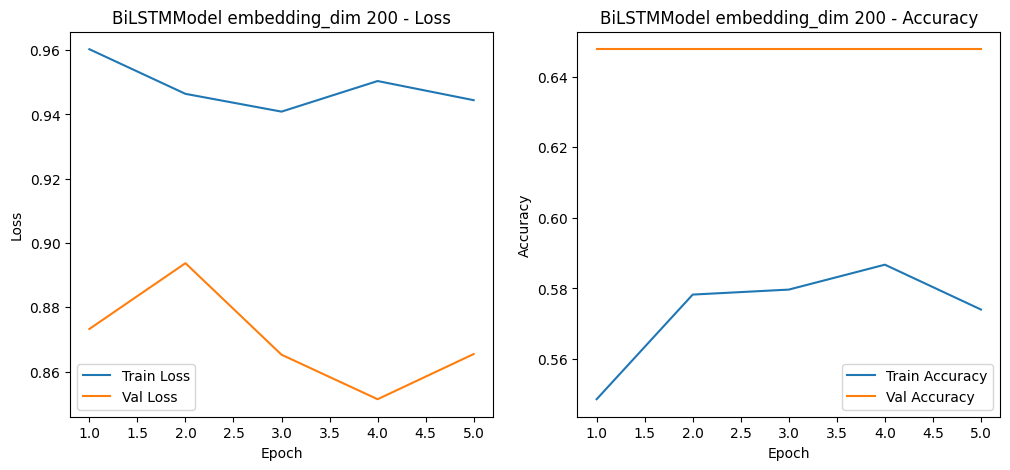

train_loss: [0.9909523570019266, 0.9523965431296307, 0.9288670783457549, 0.9514768693758093, 0.9263417487559111]
val_loss: [0.9157776832580566, 0.9088067213694254, 0.898412267367045, 0.8963213165601095, 0.8924138943354288]
train_acc: [0.5133991537376587, 0.5811001410437235, 0.5825105782792666, 0.5825105782792666, 0.5825105782792666]
val_acc: [0.6477272727272727, 0.6477272727272727, 0.6477272727272727, 0.6477272727272727, 0.6477272727272727]


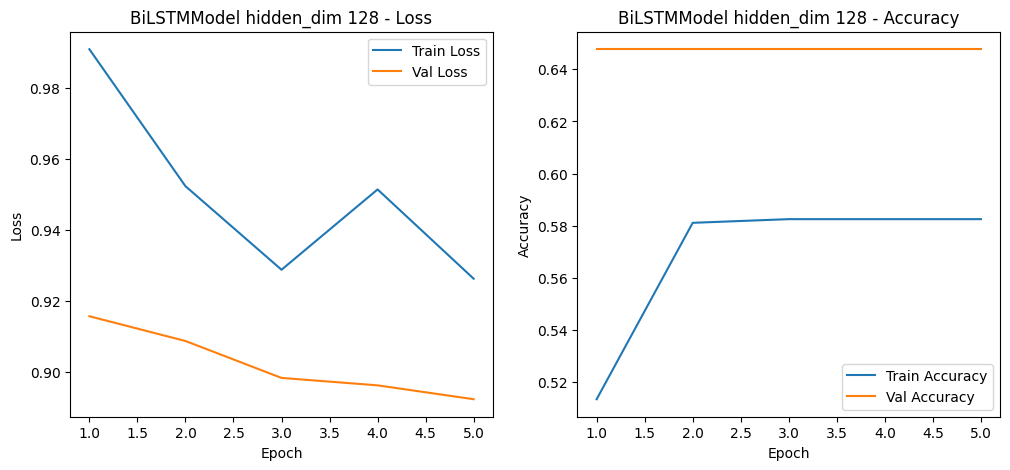

train_loss: [0.9775357220483862, 0.9323351642359858, 0.9260233174199644, 0.9266068157942399, 0.9434796053430309]
val_loss: [0.9235344529151917, 0.904502252737681, 0.9021856784820557, 0.9025595585505167, 0.887962798277537]
train_acc: [0.5458392101551481, 0.5782792665726375, 0.5853314527503526, 0.5881523272214386, 0.5839210155148096]
val_acc: [0.5568181818181818, 0.6136363636363636, 0.6022727272727273, 0.6022727272727273, 0.6022727272727273]


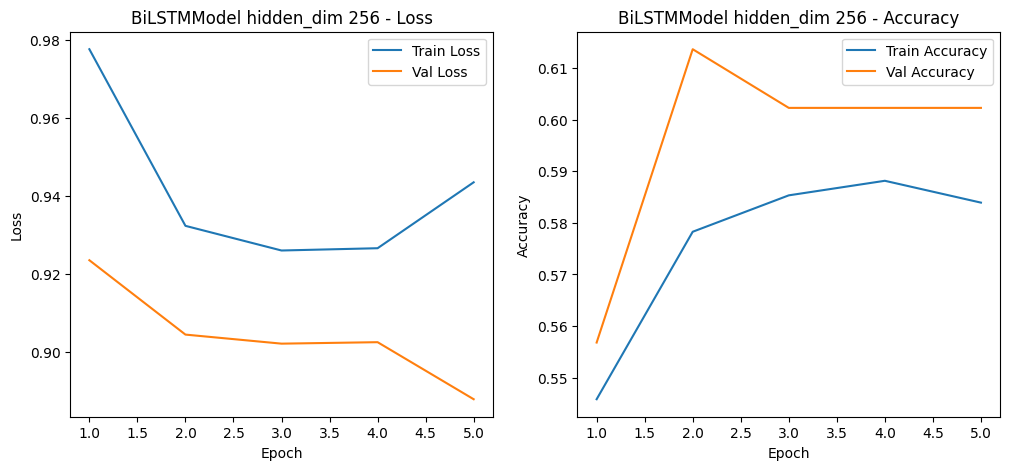

train_loss: [0.9347218922946764, 0.9184591174125671, 0.9200930154841879, 0.9051684503969939, 0.931825604127801]
val_loss: [1.0186838905016582, 1.0200302600860596, 1.0253887971242268, 1.0307940244674683, 1.0249428550402324]
train_acc: [0.5768688293370945, 0.6022566995768688, 0.6022566995768688, 0.6022566995768688, 0.6022566995768688]
val_acc: [0.5681818181818182, 0.5681818181818182, 0.5681818181818182, 0.5681818181818182, 0.5681818181818182]


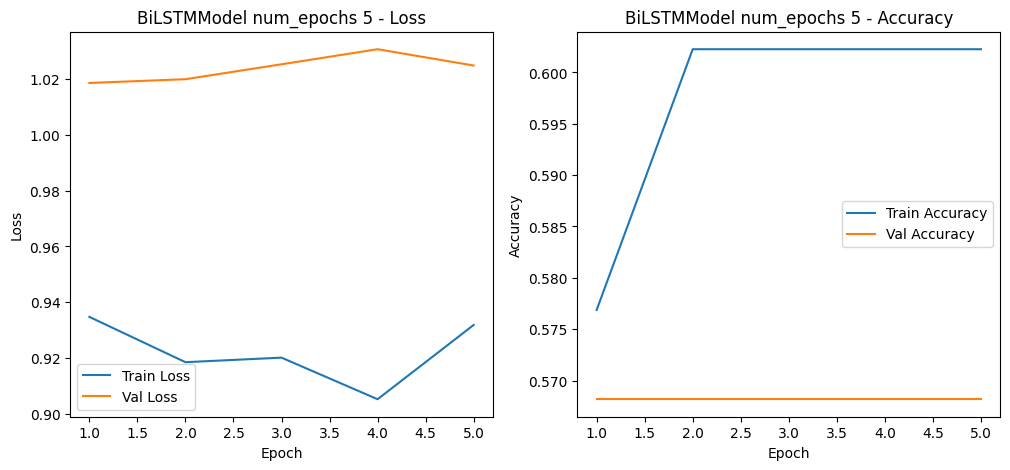

train_loss: [0.9601504673128542, 0.9331239617389181, 0.9020852679791658, 0.9068409256313158, 0.9096091648806697, 0.905661738437155, 0.9297453579695328, 0.9060517160788827, 0.9250825980435247, 0.9155109317406364]
val_loss: [0.9966501394907633, 0.9950143098831177, 1.0008745590845745, 1.0068742831548054, 1.0012422402699788, 0.9868480364481608, 0.9874847928682963, 1.0018708904584248, 0.9897196690241495, 1.0097068349520366]
train_acc: [0.5627644569816643, 0.6036671368124118, 0.6036671368124118, 0.6036671368124118, 0.5952045133991537, 0.6036671368124118, 0.6036671368124118, 0.6036671368124118, 0.6050775740479548, 0.6050775740479548]
val_acc: [0.5340909090909091, 0.5340909090909091, 0.5340909090909091, 0.5340909090909091, 0.5340909090909091, 0.5340909090909091, 0.5340909090909091, 0.5340909090909091, 0.5340909090909091, 0.5340909090909091]


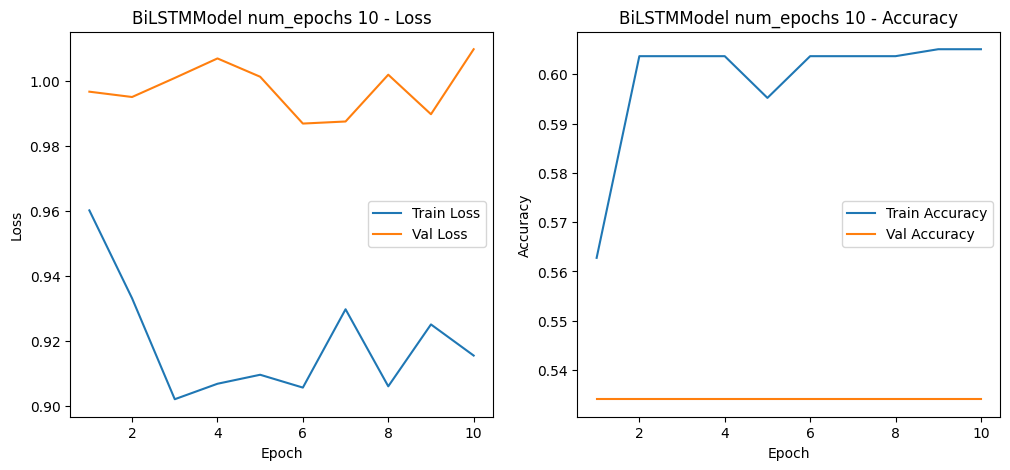

train_loss: [0.9633675632269486, 0.954308499460635, 0.9331977004590242, 0.9321871425794519, 0.9261637459630552]
val_loss: [0.8912266294161478, 0.8772016763687134, 0.898945152759552, 0.8846968412399292, 0.8920756181081136]
train_acc: [0.5528913963328632, 0.5839210155148096, 0.5825105782792666, 0.5825105782792666, 0.5867418899858956]
val_acc: [0.6136363636363636, 0.6136363636363636, 0.6136363636363636, 0.6136363636363636, 0.6136363636363636]


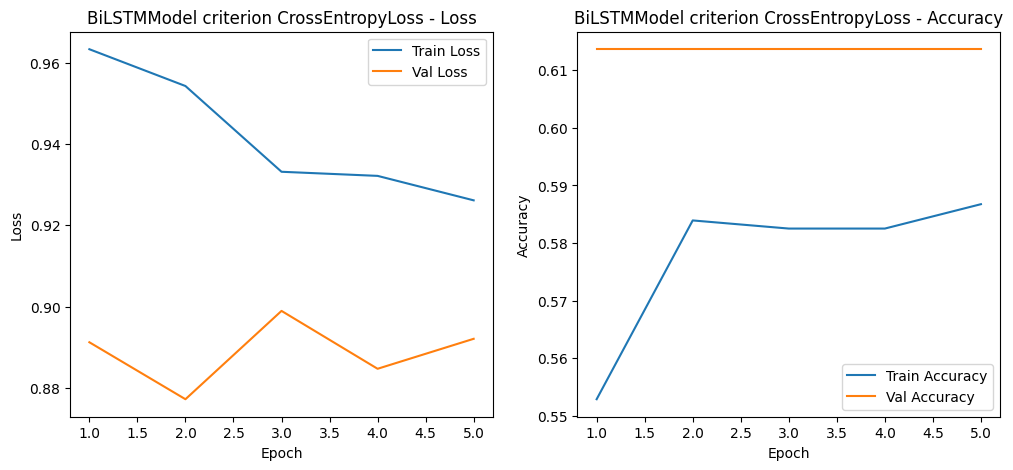

train_loss: [1.0032497670339502, 0.9731860990109651, 0.9549456886623217, 0.9263203895610311, 0.9218690550845602]
val_loss: [1.0038951237996419, 0.9753024180730184, 0.9542793035507202, 0.9514821966489156, 0.9605196913083395]
train_acc: [0.5416078984485191, 0.5825105782792666, 0.5895627644569816, 0.5909732016925247, 0.5909732016925247]
val_acc: [0.5795454545454546, 0.5909090909090909, 0.5909090909090909, 0.5909090909090909, 0.5909090909090909]


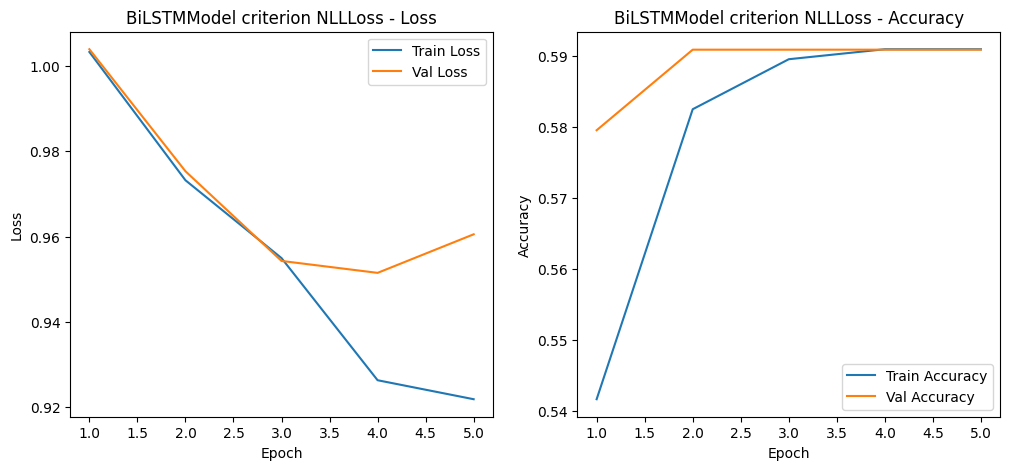

In [181]:
# 定义一个函数来创建并显示折线图
def plot_results(results):
    for result in results:
        model_name = result['model']
        hyper_name = result['hyper_name']
        param = result[hyper_name]
        lr = result['learning_rate']
        opt = result['optimizer']
        num_epochs = result['num_epochs']
        batch_size = result['batch_size']
        criterion_name = result['criterion']
        embedding_dim = result['embedding_dim']
        hidden_dim = result['hidden_dim']

        # 确认 train_loss 和 train_acc 是列表
        train_loss = [float(x) for x in result['train_loss']] if isinstance(result['train_loss'], list) else [float(result['train_loss'])]
        val_loss = [float(x) for x in result['val_loss']] if isinstance(result['val_loss'], list) else [float(result['val_loss'])]
        train_acc = [float(x) for x in result['train_acc']] if isinstance(result['train_acc'], list) else [float(result['train_acc'])]
        val_acc = [float(x) for x in result['val_acc']] if isinstance(result['val_acc'], list) else [float(result['val_acc'])]

        print(f"train_loss: {train_loss}")
        print(f"val_loss: {val_loss}")
        print(f"train_acc: {train_acc}")
        print(f"val_acc: {val_acc}")

        plt.figure(figsize=(12, 5))

        # 绘制损失图
        plt.subplot(1, 2, 1)
        plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
        plt.plot(range(1, len(val_loss) + 1), val_loss, label='Val Loss')
        plt.title(f'{model_name} {hyper_name} {param} - Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        # 绘制准确率图
        plt.subplot(1, 2, 2)
        plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train Accuracy')
        plt.plot(range(1, len(val_acc) + 1), val_acc, label='Val Accuracy')
        plt.title(f'{model_name} {hyper_name} {param} - Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.show()

plot_results(results)